# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name:

EID:

Name:

EID:

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a)This function represents the difference between estimated value by the model and the true value at certain point $x_0$ from the generator fuction. This is the bias of the estimator at $x_0$.

b) Bias describes how good the average model is, which is quantitatively how far off your modeled mean vs true mean of samples, where variance describes how sensitive the model is to variations in data. When a model is simple (in the Lasso or Ridge case, regularization is high), the bias is low but the variance is high, where each variable is given low weights; whereas for high complexity models (in the Lasso or Ridge case, regularization is low), for example overfit models, variance is low but the bias is high where training samples were all given high weight. Expected loss (E[L]) = $bias^2$ + variance + noise, so at low model complexity, E(L) is dominated by bias where at high complexity, E[L] is dominated by variance. What we need to do is to find the Goldilocks zone between the trade offs when we build our models.

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

data_load = np.load('data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [3]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)


## Answer:
# 2-a)

In [4]:
# Fit polynomial models of degrees 2, 4, 8 to the training data

poly2 = PolynomialFeatures(degree=2)
poly4 = PolynomialFeatures(degree=4)
poly7 = PolynomialFeatures(degree=7)

X_2_train = poly2.fit_transform(x_train)
X_4_train = poly4.fit_transform(x_train)
X_7_train = poly7.fit_transform(x_train)

X_2_test = poly2.fit_transform(x_test)
X_4_test = poly4.fit_transform(x_test)
X_7_test = poly7.fit_transform(x_test)

lrp2 = LinearRegression()
lrp2.fit(X_2_train, y_train)
y_2_train = lrp2.predict(X_2_train)
y_2_test = lrp2.predict(X_2_test)

lrp4 = LinearRegression()
lrp4.fit(X_4_train, y_train)
y_4_train = lrp4.predict(X_4_train)
y_4_test = lrp4.predict(X_4_test)


lrp7 = LinearRegression()
lrp7.fit(X_7_train, y_train)
y_7_train = lrp7.predict(X_7_train)
y_7_test = lrp7.predict(X_7_test)


df_train=pd.DataFrame(x_train)

df_train['y_train']   = y_train
df_train['y_2_train'] = y_2_train
df_train['y_4_train'] = y_4_train
df_train['y_7_train'] = y_7_train
df_train.columns=['x_train','y_train','y_2_train', 'y_4_train', 'y_7_train']
df_train.sort_values(by='x_train',inplace=True)

df_test=pd.DataFrame(x_test)

df_test['y_test'] = y_test
df_test['y_2_test'] = y_2_test
df_test['y_4_test'] = y_4_test
df_test['y_7_test'] = y_7_test
df_test.columns=['x_test','y_test','y_2_test', 'y_4_test', 'y_7_test']
df_test.sort_values(by='x_test',inplace=True)


In [5]:
print('MSE for degree 2 polynomial on training data is: ', mse(y_train,y_2_train))
print('MSE for degree 4 polynomial on training data is: ', mse(y_train,y_4_train))
print('MSE for degree 7 polynomial on training data is: ', mse(y_train,y_7_train))
print('MSE for degree 2 polynomial on test data is: ', mse(y_test,y_2_test))
print('MSE for degree 4 polynomial on test data is: ', mse(y_test,y_4_test))
print('MSE for degree 7 polynomial on test data is: ', mse(y_test,y_7_test))

MSE for degree 2 polynomial on training data is:  247.2967979737153
MSE for degree 4 polynomial on training data is:  31.720018057290062
MSE for degree 7 polynomial on training data is:  30.67719359210972
MSE for degree 2 polynomial on test data is:  320.0640834697786
MSE for degree 4 polynomial on test data is:  31.29208288660671
MSE for degree 7 polynomial on test data is:  33.41069407768894


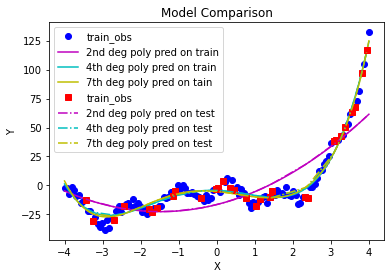

In [6]:
#Plot all model predictions vs. test data

ax = plt.gca()

ax.plot(df_train['x_train'], df_train['y_train'],linestyle='None',marker= 'o', color='b',label='train_obs')
ax.plot(df_train['x_train'], df_train['y_2_train'],linestyle='-',color='m',label='2nd deg poly pred on train')
ax.plot(df_train['x_train'], df_train['y_4_train'],linestyle='-',color='c',label='4th deg poly pred on train')
ax.plot(df_train['x_train'], df_train['y_7_train'],linestyle='-',color='y',label='7th deg poly pred on tain')

ax.plot(df_test['x_test'], df_test['y_test'],linestyle='None',marker= 's', color='r',label='train_obs')
ax.plot(df_test['x_test'], df_test['y_2_test'],linestyle='-.',color='m',label='2nd deg poly pred on test')
ax.plot(df_test['x_test'], df_test['y_4_test'],linestyle='-.',color='c',label='4th deg poly pred on test')
ax.plot(df_test['x_test'], df_test['y_7_test'],linestyle='-.',color='y',label='7th deg poly pred on test')


ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim()[::1])  # normal direction 
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Comparison')
ax.legend()
plt.axis('tight')
plt.show()


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.


As expected, for training data, 7th degree polynomial model gives the best result based on MSE, because when increasing model complexity and test the error on the data that was used to fit the model, you always get tighter 'fit' give you lower MSE with no penalty for overfitting. However, when you test your model with test data. you will see a trade off between bias and variance, when you look at the loss function loss (E[L]) = $bias^2$ + variance + noise, where when you cross the optimal complexity and complexity is too high for the given sample size, increased variance will increase with complexity resulting in higher predition error. For our case, 2nd degree and 6th degree polynomial fit gave higher MSE than 4th degree polynomial, which indicate that 4th degree polynomial fit is close to the optimal degree of model complexity for our data.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:

In [7]:

def plot_curves(x_train,y_train, x_test, y_test):


        poly2 = PolynomialFeatures(degree=2)
        poly4 = PolynomialFeatures(degree=4)
        poly7 = PolynomialFeatures(degree=7)

        X_2_train = poly2.fit_transform(x_train)
        X_4_train = poly4.fit_transform(x_train)
        X_7_train = poly7.fit_transform(x_train)

        X_2_test = poly2.fit_transform(x_test)
        X_4_test = poly4.fit_transform(x_test)
        X_7_test = poly7.fit_transform(x_test)

        lrp2 = LinearRegression()
        lrp2.fit(X_2_train, y_train)
        y_2_train = lrp2.predict(X_2_train)
        y_2_test = lrp2.predict(X_2_test)

        lrp4 = LinearRegression()
        lrp4.fit(X_4_train, y_train)
        y_4_train = lrp4.predict(X_4_train)
        y_4_test = lrp4.predict(X_4_test)


        lrp7 = LinearRegression()
        lrp7.fit(X_7_train, y_train)
        y_7_train = lrp7.predict(X_7_train)
        y_7_test = lrp7.predict(X_7_test)
        
        df_train=pd.DataFrame(x_train)

        df_train['y_train']   = y_train
        df_train['y_2_train'] = y_2_train
        df_train['y_4_train'] = y_4_train
        df_train['y_7_train'] = y_7_train
        df_train.columns=['x_train','y_train','y_2_train', 'y_4_train', 'y_7_train']
        df_train.sort_values(by='x_train',inplace=True)

        df_test=pd.DataFrame(x_test)

        df_test['y_test'] = y_test
        df_test['y_2_test'] = y_2_test
        df_test['y_4_test'] = y_4_test
        df_test['y_7_test'] = y_7_test
        df_test.columns=['x_test','y_test','y_2_test', 'y_4_test', 'y_7_test']
        df_test.sort_values(by='x_test',inplace=True)


        ax = plt.gca()

        ax.plot(df_train['x_train'], df_train['y_train'],linestyle='None',marker= 'o', color='b',label='train_obs')
        ax.plot(df_train['x_train'], df_train['y_2_train'], linestyle='-',color='m',label='2nd deg poly pred on train')
        ax.plot(df_train['x_train'], df_train['y_4_train'], linestyle='-',color='c',label='4th deg poly pred on train')
        ax.plot(df_train['x_train'], df_train['y_7_train'], linestyle='-',color='y',label='7th deg poly pred on tain')

        ax.plot(df_test['x_test'], df_test['y_test'],linestyle='None',marker= 's', color='r',label='train_obs')
        ax.plot(df_test['x_test'], df_test['y_2_test'], linestyle='-.',color='m',label='2nd deg poly pred on test')
        ax.plot(df_test['x_test'], df_test['y_4_test'], linestyle='-.',color='c',label='4th deg poly pred on test')
        ax.plot(df_test['x_test'], df_test['y_7_test'], linestyle='-.',color='y',label='7th deg poly pred on test')


        ax.set_xscale('linear')
        ax.set_xlim(ax.get_xlim()[::1])  # normal direction 
        plt.rcParams["figure.figsize"] = (8,5)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Model Comparison')
        ax.legend()
        plt.axis('tight')
        plt.show()
        
        return mse(y_train,y_2_train),mse(y_test,y_2_test),mse(y_train,y_4_train),mse(y_test,y_4_test),mse(y_train,y_7_train),mse(y_test,y_7_test)

20% data


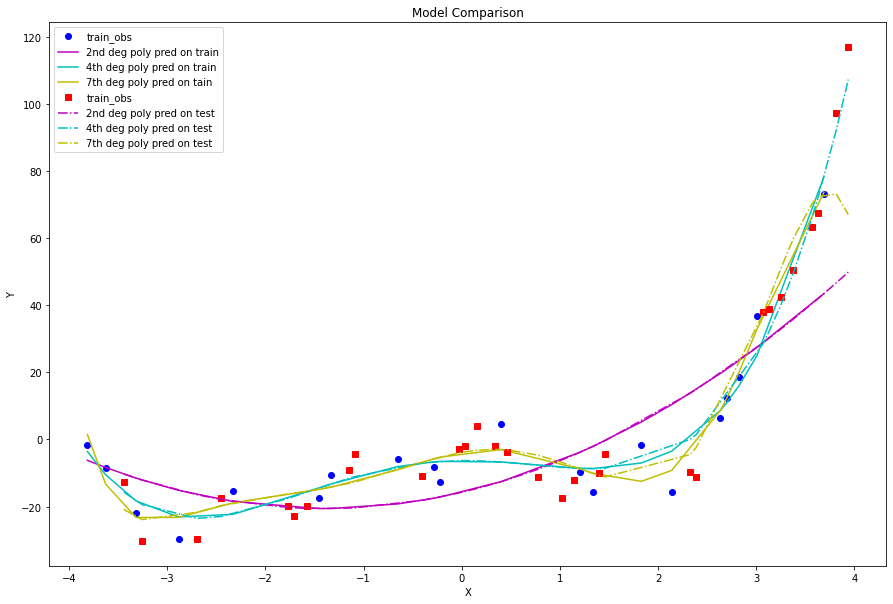

40% data


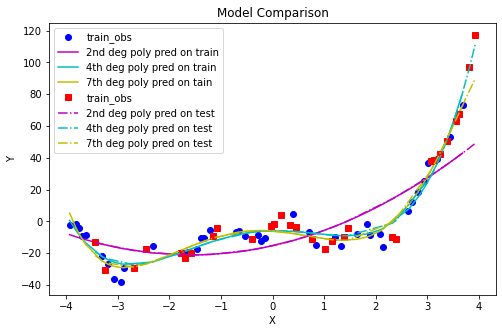

60% data


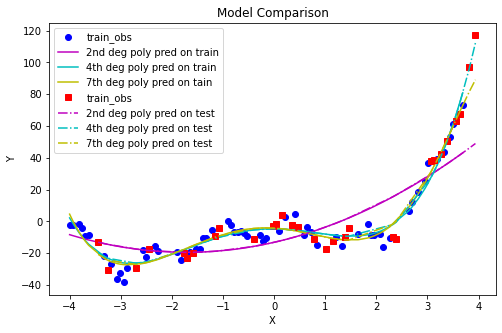

80% data


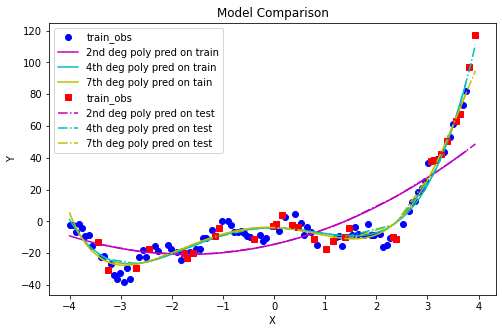

100% data


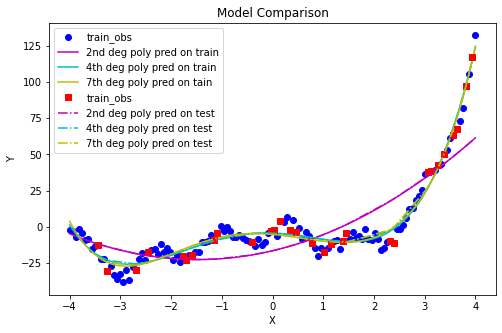

In [8]:
print("20% data")
train2_rmses_20, test2_rmses_20, train4_rmses_20, test4_rmses_20,train7_rmses_20, test7_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train2_rmses_40, test2_rmses_40,train4_rmses_40, test4_rmses_40,train7_rmses_40, test7_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train2_rmses_60, test2_rmses_60,train4_rmses_60, test4_rmses_60,train7_rmses_60, test7_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train2_rmses_80, test2_rmses_80,train4_rmses_80, test4_rmses_80,train7_rmses_80, test7_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train2_rmses_100, test2_rmses_100,train4_rmses_100, test4_rmses_100,train7_rmses_100, test7_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [9]:

mrse = pd.DataFrame({'20% data train':[train2_rmses_20, train4_rmses_20, train7_rmses_20],
                   '20% data test':[test2_rmses_20, test4_rmses_20, test7_rmses_20],
                   '40% data train':[train2_rmses_40, train4_rmses_40, train7_rmses_40],
                   '40% data test':[test2_rmses_40, test4_rmses_40, test7_rmses_40],
                   '60% data train':[train2_rmses_60, train4_rmses_60, train7_rmses_60],
                   '60% data test':[test2_rmses_60, test4_rmses_60, test7_rmses_60],
                   '80% data train':[train2_rmses_80, train4_rmses_80, train7_rmses_80],
                   '80% data test':[test2_rmses_80, test4_rmses_80, test7_rmses_80],
                   '100% data train':[train2_rmses_100, train4_rmses_100, train7_rmses_100],
                   '100% data test':[test2_rmses_100, test4_rmses_100, test7_rmses_100]},
                    index = ['degree=2', 'degree=4', 'degree=7'])


type
test    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

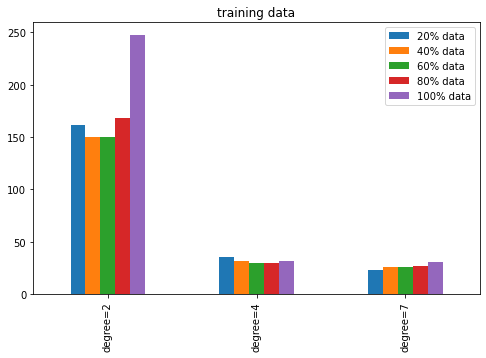

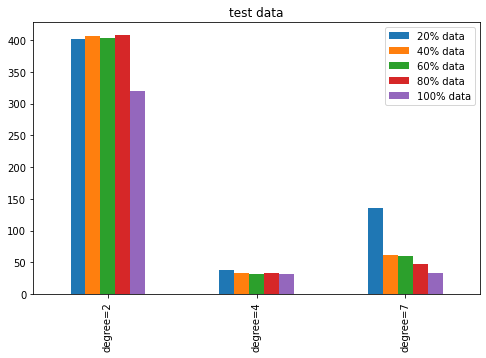

In [10]:

mrse = pd.DataFrame({
                     'type':['train','train','train','test','test','test'],
                     '20% data':[train2_rmses_20, train4_rmses_20, train7_rmses_20,test2_rmses_20, test4_rmses_20, test7_rmses_20],
                     '40% data':[train2_rmses_40, train4_rmses_40, train7_rmses_40,test2_rmses_40, test4_rmses_40, test7_rmses_40],
                     '60% data':[train2_rmses_60, train4_rmses_60, train7_rmses_60,test2_rmses_60, test4_rmses_60, test7_rmses_60],
                     '80% data':[train2_rmses_80, train4_rmses_80, train7_rmses_80,test2_rmses_80, test4_rmses_80, test7_rmses_80],
                     '100% data':[train2_rmses_100, train4_rmses_100, train7_rmses_100,test2_rmses_100, test4_rmses_100, test7_rmses_100],
                      },
                      index= ['degree=2', 'degree=4', 'degree=7','degree=2', 'degree=4', 'degree=7'])
mrse[mrse['type']=='train'].groupby('type').plot(kind='bar',title='training data')
mrse[mrse['type']=='test'].groupby('type').plot(kind='bar',title='test data')

## Answer:

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.


## Answer:

In both gradient descent (GD) and stochastic gradient descent (SGD), a set of model parameters are updated iteratively to minimize an error function. While in GD, you have to run through ALL the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use ONLY ONE or SUBSET of training sample from your training set to do the update for a parameter in a particular iteration. Thus, if the number of training samples are large, using gradient descent may take too long because in every iteration when you are updating the values of the parameters, you are running through the complete training set. On the other hand, using SGD will be faster because you use only one training sample and it starts improving itself right away from the first sample.SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. Often in most cases, the close approximation that you get in SGD for the parameter values are enough because they reach the optimal values and keep oscillating there.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

'Nelder-Mead' method is the algorithm to find minimum of a function by taking repeated steps down towards minima, and dynamically adjusts the step size based off the loss of the new point. If the new point is better than any previously seen value, it expands the step size to accelerate towards the bottom. Likewise if the new point is worse it contracts the step size to converge around the minima. This method can be easily extended into higher dimensional examples, all thats required is taking one more point than there are dimensions, reflecting the worst point around the rest of the points to take a step down.

The biggest downside of 'Nelder-Mead' as a direct search method is to deal with high dimensional functions as it's exponentially more difficult to figure out the 'direction' when dimentionality grows. As the result, 'Nelder-Mead' performs well on 1 and 2 dimensional data, however, it won't work well on even simple problems with more than a dozen or so parameters, not to mention models with millions if not billions of parameters.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

For linear regression

$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}\hat{\beta}_{j} $    ..........(1)

Here $n=3$ where

equation (1) becomes

$\hat{Y} = \sum \limits _{j=0} ^{3} X_{j}\hat{\beta}_{j} $    ..........(2)

where x0=1



(2) can be written as matrix form

$\hat{Y}=W*X^T$ Where


$$W=\begin{bmatrix} {\beta}_{0} & {\beta}_{1} & {\beta}_{2} & {\beta}_{3} \end{bmatrix}$$ and $$X=\begin{bmatrix} 1 \\ x1 \\ x1x2 \\ e^{-x_1} \end{bmatrix}$$      


Using simple square error loss function J to minimize J by updating ${\beta}_{j}$

$J(x,y,{\beta})= \sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})^2 $ ...........................(3)



Gradient is

$\frac {dJ}{dW}= 2\sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})x_{j} $  ..........................(4)



In matrix form, gradient $\eta$

$\eta=(\hat{y}_{i}-y_{i})X$


For SGD, we want to get the gradient of W from partial partial differentiation of ${\beta}_{j}$ updated from iterating each additional sample by regulating gradient with a learning rate $\alpha$

so each of the 500 samples (denoted as i here)

${\beta}_{i}={\beta}_{i-1}-{\alpha}\frac {dJ}{\beta}$


${\beta}_{i}={\beta}_{i-1}-{\alpha}\sum \limits _{j=0} ^{3} (x_{ij}{\beta}_{j}-y_{ij})x_{ij}$


In our specific case, for each sample i:

${\beta}_{0i} ={\beta}_{0(i-1)}+{\alpha}{\beta}_{0}x0_i$

Since X0=1, so for each sample i

${\beta}_{0i} ={\beta}_{0(i-1)}+{\alpha}(\hat{y}_{i}-y_{i})$

And 

$\\{\beta}_{1i} ={\beta}_{1(i-1)}-{\alpha}(\hat{y}_{i}-y_{i})*x1_{i-1}$
$\\{\beta}_{2i} ={\beta}_{2(i-1)}-{\alpha}(\hat{y}_{i}-y_{i})*x2_{i-1}$
$\\{\beta}_{3i} ={\beta}_{3(i-1)}-{\alpha}(\hat{y}_{i}-y_{i})*x3_{i-1}$

in matrix form

$W=W-{\alpha}\eta$


For Ridge Model (3) becomes

$J(x,y,{\beta})= \sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})^2 + {\lambda}\sum \limits _{j=0} ^{3}{\beta}_j^2$ ... (5)

where ${\lambda}$ is the regulation factor

(4) becomes


$\frac {dJ}{dW}= \sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})x_{j} + {\lambda}\sum \limits _{j=0} ^{3}{\beta}_j$  ..........................(6)


where constant 2 can be omitted

Since X0=1, so for each sample i

${\beta}_{0i} ={\beta}_{0(i-1)}+{\alpha}[\hat{y}_{i}-y_{i})+{\lambda}{\beta}_{0i}]$

And 

$\\{\beta}_{1i} ={\beta}_{1(i-1)}-{\alpha}[(\hat{y}_{i}-y_{i})*x1_{i-1}+{\lambda}{\beta}_{1i}]$
$\\{\beta}_{2i} ={\beta}_{2(i-1)}-{\alpha}[(\hat{y}_{i}-y_{i})*x2_{i-1}+{\lambda}{\beta}_{2i}]$
$\\{\beta}_{3i} ={\beta}_{3(i-1)}-{\alpha}[(\hat{y}_{i}-y_{i})*x3_{i-1}+{\lambda}{\beta}_{3i}]$


In matrix form, gradient $\eta$

$\eta=(\hat{y}_{i}-y_{i})X+{\lambda}W$

Update W

$W_i=W_{i-1}-\alpha\eta$


# implimentation for Linear Regression with simple squared loss function

In [11]:
import numpy as np
import math
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('SGD_samples-1.csv')
df

# Define Xy matrix
df['t1']=df['x1']
df['t2']=df['x1']*df['x2']
df['t3']=df['x1'].map(lambda x: math.exp(x))
Xy=df[['t1','t2','t3','y']]
Xy.columns=[['X1=x1','X2=x1x2','X3=exp(-x1)','y']]
Xy=np.array(Xy)
Xy

array([[0.18026969, 0.00702159, 1.19754028, 0.25673541],
       [0.72493393, 0.6092397 , 2.06459469, 0.24303665],
       [0.01278081, 0.01245801, 1.01286284, 0.43522856],
       ...,
       [0.57900411, 0.65232081, 1.78426061, 0.32648734],
       [0.08179908, 0.11644873, 1.08523774, 0.33966791],
       [0.17276752, 0.14422596, 1.18858975, 0.22943412]])

# Implimentation

In [12]:
# Square loss function
#Make a prediction with coefficients
def predict(row, coef):
    """
    y=WX
    """
    yhat = coef[0]
    for i in range(len(row)-1):
        yhat += coef[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent using square error loss function
def coefficients_sgd(train, l_rate, max_epoch):   
    '''
    Main function for stochastic gradient descent:
    Input training data, learning rate, and max epoch, if converge reached before max_epoch, stop;
    if not, continue until max epoch
    '''
    #np.random.shuffle(train)           #Shuffle X at each epoch
    coef = [0 for i in range(4)]       #Initiate coefficent matrix as [0,0,0,0]
    previous_err = 0
    for epoch in range(max_epoch):
        sum_error = 0
        for row in train: 
            #Go through each sample to update weight matrix using gradient and learning rate
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            
            coef[0] = coef[0] - l_rate * error  # wo update = wo-1/2*learning_rate*ǝ(wo+w1x1+w2x2+w3x3-y)^2/ǝwo = wo-lr*err
            for i in range(1,4):
                coef[i] = coef[i] - l_rate * error * row[i-1]  #wi update = wi-1/2*learning_rate*ǝ(wo+w1x1+w2x2+w3x3-y)^2/ǝwi= wi-lr*err*xi
        
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        print('w0={}'.format(round(coef[0],4)),'w2={}'.format(round(coef[1],4)),'w2={}'.format(round(coef[2],4)),'w3={}'.format(round(coef[3],4)))
        
        if math.fabs(sum_error-previous_err)<=0.0000001:     # stop iterate when converge
            break
        else:
            previous_err=sum_error
    return coef

# Calculate coefficients

dataset = Xy
l_rate = 0.001
max_epoch = 4000
coef = coefficients_sgd(dataset, l_rate, max_epoch)

>epoch=0, lrate=0.001, error=20.545
w0=0.0372 w2=0.017 w2=0.0036 w3=0.0613
>epoch=1, lrate=0.001, error=17.238
w0=0.0451 w2=0.0173 w2=-0.0088 w3=0.0688
>epoch=2, lrate=0.001, error=16.810
w0=0.0498 w2=0.0163 w2=-0.0217 w3=0.0714
>epoch=3, lrate=0.001, error=16.440
w0=0.0538 w2=0.0154 w2=-0.034 w3=0.0734
>epoch=4, lrate=0.001, error=16.117
w0=0.0575 w2=0.0146 w2=-0.0455 w3=0.0752
>epoch=5, lrate=0.001, error=15.836
w0=0.0607 w2=0.0139 w2=-0.0563 w3=0.077
>epoch=6, lrate=0.001, error=15.591
w0=0.0636 w2=0.0134 w2=-0.0664 w3=0.0788
>epoch=7, lrate=0.001, error=15.378
w0=0.0662 w2=0.013 w2=-0.0758 w3=0.0804
>epoch=8, lrate=0.001, error=15.191
w0=0.0685 w2=0.0128 w2=-0.0847 w3=0.082
>epoch=9, lrate=0.001, error=15.029
w0=0.0705 w2=0.0126 w2=-0.093 w3=0.0836
>epoch=10, lrate=0.001, error=14.886
w0=0.0723 w2=0.0125 w2=-0.1007 w3=0.085
>epoch=11, lrate=0.001, error=14.762
w0=0.0739 w2=0.0126 w2=-0.108 w3=0.0865
>epoch=12, lrate=0.001, error=14.652
w0=0.0753 w2=0.0126 w2=-0.1149 w3=0.0878
>epoc

w0=0.0531 w2=0.0531 w2=-0.2401 w3=0.1262
>epoch=164, lrate=0.001, error=13.724
w0=0.0531 w2=0.0532 w2=-0.2401 w3=0.1262
>epoch=165, lrate=0.001, error=13.724
w0=0.0531 w2=0.0532 w2=-0.2402 w3=0.1262
>epoch=166, lrate=0.001, error=13.724
w0=0.0531 w2=0.0533 w2=-0.2402 w3=0.1262
>epoch=167, lrate=0.001, error=13.724
w0=0.0531 w2=0.0533 w2=-0.2402 w3=0.1262
>epoch=168, lrate=0.001, error=13.724
w0=0.0531 w2=0.0534 w2=-0.2402 w3=0.1261
>epoch=169, lrate=0.001, error=13.724
w0=0.0531 w2=0.0534 w2=-0.2402 w3=0.1261
>epoch=170, lrate=0.001, error=13.724
w0=0.0531 w2=0.0535 w2=-0.2403 w3=0.1261
>epoch=171, lrate=0.001, error=13.724
w0=0.0531 w2=0.0536 w2=-0.2403 w3=0.1261
>epoch=172, lrate=0.001, error=13.724
w0=0.0531 w2=0.0536 w2=-0.2403 w3=0.1261
>epoch=173, lrate=0.001, error=13.724
w0=0.0531 w2=0.0537 w2=-0.2403 w3=0.1261
>epoch=174, lrate=0.001, error=13.724
w0=0.0531 w2=0.0537 w2=-0.2403 w3=0.1261
>epoch=175, lrate=0.001, error=13.724
w0=0.0531 w2=0.0538 w2=-0.2403 w3=0.1261
>epoch=176,

>epoch=321, lrate=0.001, error=13.723
w0=0.055 w2=0.0592 w2=-0.2409 w3=0.1236
>epoch=322, lrate=0.001, error=13.723
w0=0.055 w2=0.0592 w2=-0.2409 w3=0.1236
>epoch=323, lrate=0.001, error=13.723
w0=0.055 w2=0.0593 w2=-0.2409 w3=0.1235
>epoch=324, lrate=0.001, error=13.723
w0=0.055 w2=0.0593 w2=-0.2409 w3=0.1235
>epoch=325, lrate=0.001, error=13.723
w0=0.055 w2=0.0593 w2=-0.2409 w3=0.1235
>epoch=326, lrate=0.001, error=13.723
w0=0.055 w2=0.0594 w2=-0.2409 w3=0.1235
>epoch=327, lrate=0.001, error=13.723
w0=0.055 w2=0.0594 w2=-0.2409 w3=0.1235
>epoch=328, lrate=0.001, error=13.723
w0=0.0551 w2=0.0594 w2=-0.2409 w3=0.1234
>epoch=329, lrate=0.001, error=13.723
w0=0.0551 w2=0.0595 w2=-0.2409 w3=0.1234
>epoch=330, lrate=0.001, error=13.723
w0=0.0551 w2=0.0595 w2=-0.2409 w3=0.1234
>epoch=331, lrate=0.001, error=13.723
w0=0.0551 w2=0.0595 w2=-0.2409 w3=0.1234
>epoch=332, lrate=0.001, error=13.723
w0=0.0551 w2=0.0596 w2=-0.2409 w3=0.1234
>epoch=333, lrate=0.001, error=13.723
w0=0.0551 w2=0.0596 w

w0=0.0572 w2=0.0637 w2=-0.241 w3=0.121
>epoch=463, lrate=0.001, error=13.723
w0=0.0572 w2=0.0637 w2=-0.241 w3=0.121
>epoch=464, lrate=0.001, error=13.723
w0=0.0572 w2=0.0638 w2=-0.241 w3=0.1209
>epoch=465, lrate=0.001, error=13.723
w0=0.0572 w2=0.0638 w2=-0.241 w3=0.1209
>epoch=466, lrate=0.001, error=13.723
w0=0.0573 w2=0.0638 w2=-0.241 w3=0.1209
>epoch=467, lrate=0.001, error=13.723
w0=0.0573 w2=0.0639 w2=-0.241 w3=0.1209
>epoch=468, lrate=0.001, error=13.723
w0=0.0573 w2=0.0639 w2=-0.241 w3=0.1209
>epoch=469, lrate=0.001, error=13.723
w0=0.0573 w2=0.0639 w2=-0.241 w3=0.1208
>epoch=470, lrate=0.001, error=13.723
w0=0.0573 w2=0.064 w2=-0.241 w3=0.1208
>epoch=471, lrate=0.001, error=13.723
w0=0.0573 w2=0.064 w2=-0.241 w3=0.1208
>epoch=472, lrate=0.001, error=13.723
w0=0.0573 w2=0.064 w2=-0.241 w3=0.1208
>epoch=473, lrate=0.001, error=13.723
w0=0.0574 w2=0.064 w2=-0.241 w3=0.1208
>epoch=474, lrate=0.001, error=13.723
w0=0.0574 w2=0.0641 w2=-0.241 w3=0.1208
>epoch=475, lrate=0.001, error

>epoch=610, lrate=0.001, error=13.722
w0=0.0594 w2=0.0681 w2=-0.2411 w3=0.1184
>epoch=611, lrate=0.001, error=13.722
w0=0.0594 w2=0.0682 w2=-0.2411 w3=0.1184
>epoch=612, lrate=0.001, error=13.722
w0=0.0594 w2=0.0682 w2=-0.2411 w3=0.1184
>epoch=613, lrate=0.001, error=13.722
w0=0.0594 w2=0.0682 w2=-0.2411 w3=0.1184
>epoch=614, lrate=0.001, error=13.722
w0=0.0595 w2=0.0683 w2=-0.2411 w3=0.1183
>epoch=615, lrate=0.001, error=13.722
w0=0.0595 w2=0.0683 w2=-0.2411 w3=0.1183
>epoch=616, lrate=0.001, error=13.722
w0=0.0595 w2=0.0683 w2=-0.2411 w3=0.1183
>epoch=617, lrate=0.001, error=13.722
w0=0.0595 w2=0.0683 w2=-0.2411 w3=0.1183
>epoch=618, lrate=0.001, error=13.722
w0=0.0595 w2=0.0684 w2=-0.2411 w3=0.1183
>epoch=619, lrate=0.001, error=13.722
w0=0.0595 w2=0.0684 w2=-0.2411 w3=0.1183
>epoch=620, lrate=0.001, error=13.722
w0=0.0595 w2=0.0684 w2=-0.2411 w3=0.1182
>epoch=621, lrate=0.001, error=13.722
w0=0.0596 w2=0.0685 w2=-0.2411 w3=0.1182
>epoch=622, lrate=0.001, error=13.722
w0=0.0596 w2=0

>epoch=728, lrate=0.001, error=13.722
w0=0.0611 w2=0.0715 w2=-0.2411 w3=0.1165
>epoch=729, lrate=0.001, error=13.722
w0=0.0611 w2=0.0715 w2=-0.2411 w3=0.1165
>epoch=730, lrate=0.001, error=13.722
w0=0.0611 w2=0.0715 w2=-0.2411 w3=0.1164
>epoch=731, lrate=0.001, error=13.722
w0=0.0611 w2=0.0716 w2=-0.2411 w3=0.1164
>epoch=732, lrate=0.001, error=13.722
w0=0.0611 w2=0.0716 w2=-0.2411 w3=0.1164
>epoch=733, lrate=0.001, error=13.722
w0=0.0611 w2=0.0716 w2=-0.2411 w3=0.1164
>epoch=734, lrate=0.001, error=13.722
w0=0.0612 w2=0.0716 w2=-0.2411 w3=0.1164
>epoch=735, lrate=0.001, error=13.722
w0=0.0612 w2=0.0717 w2=-0.2411 w3=0.1164
>epoch=736, lrate=0.001, error=13.722
w0=0.0612 w2=0.0717 w2=-0.2411 w3=0.1164
>epoch=737, lrate=0.001, error=13.722
w0=0.0612 w2=0.0717 w2=-0.2411 w3=0.1163
>epoch=738, lrate=0.001, error=13.722
w0=0.0612 w2=0.0718 w2=-0.2411 w3=0.1163
>epoch=739, lrate=0.001, error=13.722
w0=0.0612 w2=0.0718 w2=-0.2411 w3=0.1163
>epoch=740, lrate=0.001, error=13.722
w0=0.0612 w2=0

w0=0.063 w2=0.0753 w2=-0.2411 w3=0.1143
>epoch=872, lrate=0.001, error=13.722
w0=0.063 w2=0.0753 w2=-0.2411 w3=0.1143
>epoch=873, lrate=0.001, error=13.722
w0=0.063 w2=0.0754 w2=-0.2411 w3=0.1142
>epoch=874, lrate=0.001, error=13.722
w0=0.063 w2=0.0754 w2=-0.2411 w3=0.1142
>epoch=875, lrate=0.001, error=13.722
w0=0.063 w2=0.0754 w2=-0.2411 w3=0.1142
>epoch=876, lrate=0.001, error=13.722
w0=0.063 w2=0.0754 w2=-0.2411 w3=0.1142
>epoch=877, lrate=0.001, error=13.722
w0=0.0631 w2=0.0755 w2=-0.2411 w3=0.1142
>epoch=878, lrate=0.001, error=13.722
w0=0.0631 w2=0.0755 w2=-0.2411 w3=0.1142
>epoch=879, lrate=0.001, error=13.722
w0=0.0631 w2=0.0755 w2=-0.2411 w3=0.1141
>epoch=880, lrate=0.001, error=13.722
w0=0.0631 w2=0.0755 w2=-0.2411 w3=0.1141
>epoch=881, lrate=0.001, error=13.722
w0=0.0631 w2=0.0756 w2=-0.2411 w3=0.1141
>epoch=882, lrate=0.001, error=13.722
w0=0.0631 w2=0.0756 w2=-0.2411 w3=0.1141
>epoch=883, lrate=0.001, error=13.722
w0=0.0631 w2=0.0756 w2=-0.2411 w3=0.1141
>epoch=884, lrate

>epoch=1023, lrate=0.001, error=13.721
w0=0.0649 w2=0.0791 w2=-0.2412 w3=0.1121
>epoch=1024, lrate=0.001, error=13.721
w0=0.0649 w2=0.0792 w2=-0.2412 w3=0.112
>epoch=1025, lrate=0.001, error=13.721
w0=0.0649 w2=0.0792 w2=-0.2412 w3=0.112
>epoch=1026, lrate=0.001, error=13.721
w0=0.0649 w2=0.0792 w2=-0.2412 w3=0.112
>epoch=1027, lrate=0.001, error=13.721
w0=0.0649 w2=0.0792 w2=-0.2412 w3=0.112
>epoch=1028, lrate=0.001, error=13.721
w0=0.065 w2=0.0793 w2=-0.2412 w3=0.112
>epoch=1029, lrate=0.001, error=13.721
w0=0.065 w2=0.0793 w2=-0.2412 w3=0.112
>epoch=1030, lrate=0.001, error=13.721
w0=0.065 w2=0.0793 w2=-0.2412 w3=0.112
>epoch=1031, lrate=0.001, error=13.721
w0=0.065 w2=0.0793 w2=-0.2412 w3=0.1119
>epoch=1032, lrate=0.001, error=13.721
w0=0.065 w2=0.0793 w2=-0.2412 w3=0.1119
>epoch=1033, lrate=0.001, error=13.721
w0=0.065 w2=0.0794 w2=-0.2412 w3=0.1119
>epoch=1034, lrate=0.001, error=13.721
w0=0.065 w2=0.0794 w2=-0.2412 w3=0.1119
>epoch=1035, lrate=0.001, error=13.721
w0=0.065 w2=0.0

>epoch=1186, lrate=0.001, error=13.721
w0=0.0668 w2=0.083 w2=-0.2412 w3=0.1098
>epoch=1187, lrate=0.001, error=13.721
w0=0.0668 w2=0.083 w2=-0.2412 w3=0.1098
>epoch=1188, lrate=0.001, error=13.721
w0=0.0668 w2=0.083 w2=-0.2412 w3=0.1098
>epoch=1189, lrate=0.001, error=13.721
w0=0.0668 w2=0.083 w2=-0.2412 w3=0.1098
>epoch=1190, lrate=0.001, error=13.721
w0=0.0668 w2=0.083 w2=-0.2412 w3=0.1098
>epoch=1191, lrate=0.001, error=13.721
w0=0.0669 w2=0.0831 w2=-0.2412 w3=0.1098
>epoch=1192, lrate=0.001, error=13.721
w0=0.0669 w2=0.0831 w2=-0.2412 w3=0.1098
>epoch=1193, lrate=0.001, error=13.721
w0=0.0669 w2=0.0831 w2=-0.2412 w3=0.1098
>epoch=1194, lrate=0.001, error=13.721
w0=0.0669 w2=0.0831 w2=-0.2412 w3=0.1097
>epoch=1195, lrate=0.001, error=13.721
w0=0.0669 w2=0.0832 w2=-0.2412 w3=0.1097
>epoch=1196, lrate=0.001, error=13.721
w0=0.0669 w2=0.0832 w2=-0.2412 w3=0.1097
>epoch=1197, lrate=0.001, error=13.721
w0=0.0669 w2=0.0832 w2=-0.2412 w3=0.1097
>epoch=1198, lrate=0.001, error=13.721
w0=0.0

>epoch=1344, lrate=0.001, error=13.721
w0=0.0685 w2=0.0864 w2=-0.2413 w3=0.1078
>epoch=1345, lrate=0.001, error=13.721
w0=0.0685 w2=0.0864 w2=-0.2413 w3=0.1078
>epoch=1346, lrate=0.001, error=13.721
w0=0.0686 w2=0.0865 w2=-0.2413 w3=0.1078
>epoch=1347, lrate=0.001, error=13.721
w0=0.0686 w2=0.0865 w2=-0.2413 w3=0.1078
>epoch=1348, lrate=0.001, error=13.721
w0=0.0686 w2=0.0865 w2=-0.2413 w3=0.1078
>epoch=1349, lrate=0.001, error=13.721
w0=0.0686 w2=0.0865 w2=-0.2413 w3=0.1078
>epoch=1350, lrate=0.001, error=13.721
w0=0.0686 w2=0.0865 w2=-0.2413 w3=0.1078
>epoch=1351, lrate=0.001, error=13.721
w0=0.0686 w2=0.0866 w2=-0.2413 w3=0.1078
>epoch=1352, lrate=0.001, error=13.721
w0=0.0686 w2=0.0866 w2=-0.2413 w3=0.1077
>epoch=1353, lrate=0.001, error=13.721
w0=0.0686 w2=0.0866 w2=-0.2413 w3=0.1077
>epoch=1354, lrate=0.001, error=13.721
w0=0.0686 w2=0.0866 w2=-0.2413 w3=0.1077
>epoch=1355, lrate=0.001, error=13.721
w0=0.0686 w2=0.0866 w2=-0.2413 w3=0.1077
>epoch=1356, lrate=0.001, error=13.721
w

w0=0.07 w2=0.0894 w2=-0.2413 w3=0.1061
>epoch=1490, lrate=0.001, error=13.721
w0=0.07 w2=0.0894 w2=-0.2413 w3=0.1061
>epoch=1491, lrate=0.001, error=13.721
w0=0.07 w2=0.0894 w2=-0.2413 w3=0.1061
>epoch=1492, lrate=0.001, error=13.721
w0=0.0701 w2=0.0895 w2=-0.2413 w3=0.1061
>epoch=1493, lrate=0.001, error=13.721
w0=0.0701 w2=0.0895 w2=-0.2413 w3=0.1061
>epoch=1494, lrate=0.001, error=13.721
w0=0.0701 w2=0.0895 w2=-0.2413 w3=0.1061
>epoch=1495, lrate=0.001, error=13.721
w0=0.0701 w2=0.0895 w2=-0.2413 w3=0.1061
>epoch=1496, lrate=0.001, error=13.721
w0=0.0701 w2=0.0895 w2=-0.2413 w3=0.106
>epoch=1497, lrate=0.001, error=13.721
w0=0.0701 w2=0.0896 w2=-0.2413 w3=0.106
>epoch=1498, lrate=0.001, error=13.721
w0=0.0701 w2=0.0896 w2=-0.2413 w3=0.106
>epoch=1499, lrate=0.001, error=13.721
w0=0.0701 w2=0.0896 w2=-0.2413 w3=0.106
>epoch=1500, lrate=0.001, error=13.721
w0=0.0701 w2=0.0896 w2=-0.2413 w3=0.106
>epoch=1501, lrate=0.001, error=13.721
w0=0.0701 w2=0.0896 w2=-0.2413 w3=0.106
>epoch=1502

>epoch=1623, lrate=0.001, error=13.721
w0=0.0713 w2=0.092 w2=-0.2413 w3=0.1046
>epoch=1624, lrate=0.001, error=13.721
w0=0.0713 w2=0.092 w2=-0.2413 w3=0.1046
>epoch=1625, lrate=0.001, error=13.721
w0=0.0713 w2=0.092 w2=-0.2413 w3=0.1046
>epoch=1626, lrate=0.001, error=13.721
w0=0.0713 w2=0.092 w2=-0.2413 w3=0.1046
>epoch=1627, lrate=0.001, error=13.721
w0=0.0714 w2=0.0921 w2=-0.2413 w3=0.1046
>epoch=1628, lrate=0.001, error=13.721
w0=0.0714 w2=0.0921 w2=-0.2413 w3=0.1046
>epoch=1629, lrate=0.001, error=13.721
w0=0.0714 w2=0.0921 w2=-0.2413 w3=0.1046
>epoch=1630, lrate=0.001, error=13.721
w0=0.0714 w2=0.0921 w2=-0.2413 w3=0.1045
>epoch=1631, lrate=0.001, error=13.721
w0=0.0714 w2=0.0921 w2=-0.2413 w3=0.1045
>epoch=1632, lrate=0.001, error=13.721
w0=0.0714 w2=0.0922 w2=-0.2413 w3=0.1045
>epoch=1633, lrate=0.001, error=13.721
w0=0.0714 w2=0.0922 w2=-0.2413 w3=0.1045
>epoch=1634, lrate=0.001, error=13.721
w0=0.0714 w2=0.0922 w2=-0.2413 w3=0.1045
>epoch=1635, lrate=0.001, error=13.721
w0=0.

>epoch=1777, lrate=0.001, error=13.721
w0=0.0727 w2=0.0948 w2=-0.2414 w3=0.103
>epoch=1778, lrate=0.001, error=13.721
w0=0.0727 w2=0.0948 w2=-0.2414 w3=0.103
>epoch=1779, lrate=0.001, error=13.721
w0=0.0727 w2=0.0948 w2=-0.2414 w3=0.103
>epoch=1780, lrate=0.001, error=13.721
w0=0.0727 w2=0.0948 w2=-0.2414 w3=0.103
>epoch=1781, lrate=0.001, error=13.721
w0=0.0727 w2=0.0949 w2=-0.2414 w3=0.103
>epoch=1782, lrate=0.001, error=13.721
w0=0.0728 w2=0.0949 w2=-0.2414 w3=0.103
>epoch=1783, lrate=0.001, error=13.721
w0=0.0728 w2=0.0949 w2=-0.2414 w3=0.1029
>epoch=1784, lrate=0.001, error=13.721
w0=0.0728 w2=0.0949 w2=-0.2414 w3=0.1029
>epoch=1785, lrate=0.001, error=13.721
w0=0.0728 w2=0.0949 w2=-0.2414 w3=0.1029
>epoch=1786, lrate=0.001, error=13.721
w0=0.0728 w2=0.0949 w2=-0.2414 w3=0.1029
>epoch=1787, lrate=0.001, error=13.721
w0=0.0728 w2=0.095 w2=-0.2414 w3=0.1029
>epoch=1788, lrate=0.001, error=13.721
w0=0.0728 w2=0.095 w2=-0.2414 w3=0.1029
>epoch=1789, lrate=0.001, error=13.721
w0=0.0728

>epoch=1940, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1014
>epoch=1941, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1014
>epoch=1942, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1014
>epoch=1943, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1014
>epoch=1944, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1014
>epoch=1945, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1014
>epoch=1946, lrate=0.001, error=13.720
w0=0.0741 w2=0.0976 w2=-0.2414 w3=0.1013
>epoch=1947, lrate=0.001, error=13.720
w0=0.0742 w2=0.0977 w2=-0.2414 w3=0.1013
>epoch=1948, lrate=0.001, error=13.720
w0=0.0742 w2=0.0977 w2=-0.2414 w3=0.1013
>epoch=1949, lrate=0.001, error=13.720
w0=0.0742 w2=0.0977 w2=-0.2414 w3=0.1013
>epoch=1950, lrate=0.001, error=13.720
w0=0.0742 w2=0.0977 w2=-0.2414 w3=0.1013
>epoch=1951, lrate=0.001, error=13.720
w0=0.0742 w2=0.0977 w2=-0.2414 w3=0.1013
>epoch=1952, lrate=0.001, error=13.720
w

>epoch=2072, lrate=0.001, error=13.720
w0=0.0751 w2=0.0997 w2=-0.2414 w3=0.1002
>epoch=2073, lrate=0.001, error=13.720
w0=0.0752 w2=0.0997 w2=-0.2414 w3=0.1002
>epoch=2074, lrate=0.001, error=13.720
w0=0.0752 w2=0.0997 w2=-0.2414 w3=0.1002
>epoch=2075, lrate=0.001, error=13.720
w0=0.0752 w2=0.0997 w2=-0.2414 w3=0.1002
>epoch=2076, lrate=0.001, error=13.720
w0=0.0752 w2=0.0997 w2=-0.2414 w3=0.1002
>epoch=2077, lrate=0.001, error=13.720
w0=0.0752 w2=0.0997 w2=-0.2414 w3=0.1001
>epoch=2078, lrate=0.001, error=13.720
w0=0.0752 w2=0.0997 w2=-0.2414 w3=0.1001
>epoch=2079, lrate=0.001, error=13.720
w0=0.0752 w2=0.0998 w2=-0.2414 w3=0.1001
>epoch=2080, lrate=0.001, error=13.720
w0=0.0752 w2=0.0998 w2=-0.2414 w3=0.1001
>epoch=2081, lrate=0.001, error=13.720
w0=0.0752 w2=0.0998 w2=-0.2414 w3=0.1001
>epoch=2082, lrate=0.001, error=13.720
w0=0.0752 w2=0.0998 w2=-0.2414 w3=0.1001
>epoch=2083, lrate=0.001, error=13.720
w0=0.0752 w2=0.0998 w2=-0.2414 w3=0.1001
>epoch=2084, lrate=0.001, error=13.720
w

w0=0.0764 w2=0.1022 w2=-0.2414 w3=0.0987
>epoch=2246, lrate=0.001, error=13.720
w0=0.0764 w2=0.1023 w2=-0.2414 w3=0.0987
>epoch=2247, lrate=0.001, error=13.720
w0=0.0765 w2=0.1023 w2=-0.2414 w3=0.0987
>epoch=2248, lrate=0.001, error=13.720
w0=0.0765 w2=0.1023 w2=-0.2414 w3=0.0987
>epoch=2249, lrate=0.001, error=13.720
w0=0.0765 w2=0.1023 w2=-0.2414 w3=0.0987
>epoch=2250, lrate=0.001, error=13.720
w0=0.0765 w2=0.1023 w2=-0.2414 w3=0.0987
>epoch=2251, lrate=0.001, error=13.720
w0=0.0765 w2=0.1023 w2=-0.2414 w3=0.0986
>epoch=2252, lrate=0.001, error=13.720
w0=0.0765 w2=0.1023 w2=-0.2414 w3=0.0986
>epoch=2253, lrate=0.001, error=13.720
w0=0.0765 w2=0.1024 w2=-0.2414 w3=0.0986
>epoch=2254, lrate=0.001, error=13.720
w0=0.0765 w2=0.1024 w2=-0.2414 w3=0.0986
>epoch=2255, lrate=0.001, error=13.720
w0=0.0765 w2=0.1024 w2=-0.2414 w3=0.0986
>epoch=2256, lrate=0.001, error=13.720
w0=0.0765 w2=0.1024 w2=-0.2414 w3=0.0986
>epoch=2257, lrate=0.001, error=13.720
w0=0.0765 w2=0.1024 w2=-0.2414 w3=0.0986

>epoch=2391, lrate=0.001, error=13.720
w0=0.0775 w2=0.1043 w2=-0.2415 w3=0.0975
>epoch=2392, lrate=0.001, error=13.720
w0=0.0775 w2=0.1043 w2=-0.2415 w3=0.0975
>epoch=2393, lrate=0.001, error=13.720
w0=0.0775 w2=0.1043 w2=-0.2415 w3=0.0975
>epoch=2394, lrate=0.001, error=13.720
w0=0.0775 w2=0.1043 w2=-0.2415 w3=0.0975
>epoch=2395, lrate=0.001, error=13.720
w0=0.0775 w2=0.1043 w2=-0.2415 w3=0.0975
>epoch=2396, lrate=0.001, error=13.720
w0=0.0775 w2=0.1043 w2=-0.2415 w3=0.0975
>epoch=2397, lrate=0.001, error=13.720
w0=0.0775 w2=0.1044 w2=-0.2415 w3=0.0975
>epoch=2398, lrate=0.001, error=13.720
w0=0.0775 w2=0.1044 w2=-0.2415 w3=0.0975
>epoch=2399, lrate=0.001, error=13.720
w0=0.0775 w2=0.1044 w2=-0.2415 w3=0.0975
>epoch=2400, lrate=0.001, error=13.720
w0=0.0775 w2=0.1044 w2=-0.2415 w3=0.0975
>epoch=2401, lrate=0.001, error=13.720
w0=0.0775 w2=0.1044 w2=-0.2415 w3=0.0974
>epoch=2402, lrate=0.001, error=13.720
w0=0.0775 w2=0.1044 w2=-0.2415 w3=0.0974
>epoch=2403, lrate=0.001, error=13.720
w

>epoch=2560, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2561, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2562, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2563, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2564, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2565, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2566, lrate=0.001, error=13.720
w0=0.0786 w2=0.1065 w2=-0.2415 w3=0.0962
>epoch=2567, lrate=0.001, error=13.720
w0=0.0786 w2=0.1066 w2=-0.2415 w3=0.0962
>epoch=2568, lrate=0.001, error=13.720
w0=0.0786 w2=0.1066 w2=-0.2415 w3=0.0962
>epoch=2569, lrate=0.001, error=13.720
w0=0.0786 w2=0.1066 w2=-0.2415 w3=0.0962
>epoch=2570, lrate=0.001, error=13.720
w0=0.0786 w2=0.1066 w2=-0.2415 w3=0.0962
>epoch=2571, lrate=0.001, error=13.720
w0=0.0786 w2=0.1066 w2=-0.2415 w3=0.0962
>epoch=2572, lrate=0.001, error=13.720
w

>epoch=2701, lrate=0.001, error=13.720
w0=0.0794 w2=0.1082 w2=-0.2415 w3=0.0953
>epoch=2702, lrate=0.001, error=13.720
w0=0.0794 w2=0.1082 w2=-0.2415 w3=0.0952
>epoch=2703, lrate=0.001, error=13.720
w0=0.0794 w2=0.1082 w2=-0.2415 w3=0.0952
>epoch=2704, lrate=0.001, error=13.720
w0=0.0794 w2=0.1082 w2=-0.2415 w3=0.0952
>epoch=2705, lrate=0.001, error=13.720
w0=0.0794 w2=0.1082 w2=-0.2415 w3=0.0952
>epoch=2706, lrate=0.001, error=13.720
w0=0.0794 w2=0.1082 w2=-0.2415 w3=0.0952
>epoch=2707, lrate=0.001, error=13.720
w0=0.0794 w2=0.1083 w2=-0.2415 w3=0.0952
>epoch=2708, lrate=0.001, error=13.720
w0=0.0795 w2=0.1083 w2=-0.2415 w3=0.0952
>epoch=2709, lrate=0.001, error=13.720
w0=0.0795 w2=0.1083 w2=-0.2415 w3=0.0952
>epoch=2710, lrate=0.001, error=13.720
w0=0.0795 w2=0.1083 w2=-0.2415 w3=0.0952
>epoch=2711, lrate=0.001, error=13.720
w0=0.0795 w2=0.1083 w2=-0.2415 w3=0.0952
>epoch=2712, lrate=0.001, error=13.720
w0=0.0795 w2=0.1083 w2=-0.2415 w3=0.0952
>epoch=2713, lrate=0.001, error=13.720
w

>epoch=2864, lrate=0.001, error=13.720
w0=0.0803 w2=0.11 w2=-0.2415 w3=0.0942
>epoch=2865, lrate=0.001, error=13.720
w0=0.0803 w2=0.1101 w2=-0.2415 w3=0.0942
>epoch=2866, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0942
>epoch=2867, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0942
>epoch=2868, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0942
>epoch=2869, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0941
>epoch=2870, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0941
>epoch=2871, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0941
>epoch=2872, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0941
>epoch=2873, lrate=0.001, error=13.720
w0=0.0804 w2=0.1101 w2=-0.2415 w3=0.0941
>epoch=2874, lrate=0.001, error=13.720
w0=0.0804 w2=0.1102 w2=-0.2415 w3=0.0941
>epoch=2875, lrate=0.001, error=13.720
w0=0.0804 w2=0.1102 w2=-0.2415 w3=0.0941
>epoch=2876, lrate=0.001, error=13.720
w0=

>epoch=3015, lrate=0.001, error=13.720
w0=0.0811 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3016, lrate=0.001, error=13.720
w0=0.0811 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3017, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3018, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3019, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3020, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3021, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3022, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3023, lrate=0.001, error=13.720
w0=0.0812 w2=0.1117 w2=-0.2416 w3=0.0932
>epoch=3024, lrate=0.001, error=13.720
w0=0.0812 w2=0.1118 w2=-0.2416 w3=0.0932
>epoch=3025, lrate=0.001, error=13.720
w0=0.0812 w2=0.1118 w2=-0.2416 w3=0.0932
>epoch=3026, lrate=0.001, error=13.720
w0=0.0812 w2=0.1118 w2=-0.2416 w3=0.0932
>epoch=3027, lrate=0.001, error=13.720
w

>epoch=3187, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0923
>epoch=3188, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0923
>epoch=3189, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3190, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3191, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3192, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3193, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3194, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3195, lrate=0.001, error=13.720
w0=0.082 w2=0.1134 w2=-0.2416 w3=0.0922
>epoch=3196, lrate=0.001, error=13.720
w0=0.082 w2=0.1135 w2=-0.2416 w3=0.0922
>epoch=3197, lrate=0.001, error=13.720
w0=0.082 w2=0.1135 w2=-0.2416 w3=0.0922
>epoch=3198, lrate=0.001, error=13.720
w0=0.0821 w2=0.1135 w2=-0.2416 w3=0.0922
>epoch=3199, lrate=0.001, error=13.720
w0=0.0821 w2

>epoch=3333, lrate=0.001, error=13.720
w0=0.0827 w2=0.1147 w2=-0.2416 w3=0.0915
>epoch=3334, lrate=0.001, error=13.720
w0=0.0827 w2=0.1147 w2=-0.2416 w3=0.0915
>epoch=3335, lrate=0.001, error=13.720
w0=0.0827 w2=0.1147 w2=-0.2416 w3=0.0915
>epoch=3336, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0915
>epoch=3337, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0915
>epoch=3338, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3339, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3340, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3341, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3342, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3343, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3344, lrate=0.001, error=13.720
w0=0.0827 w2=0.1148 w2=-0.2416 w3=0.0914
>epoch=3345, lrate=0.001, error=13.720
w

w0=0.0833 w2=0.1159 w2=-0.2416 w3=0.0908
>epoch=3470, lrate=0.001, error=13.720
w0=0.0833 w2=0.1159 w2=-0.2416 w3=0.0908
>epoch=3471, lrate=0.001, error=13.720
w0=0.0833 w2=0.1159 w2=-0.2416 w3=0.0908
>epoch=3472, lrate=0.001, error=13.720
w0=0.0833 w2=0.1159 w2=-0.2416 w3=0.0908
>epoch=3473, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0908
>epoch=3474, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0908
>epoch=3475, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0908
>epoch=3476, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0907
>epoch=3477, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0907
>epoch=3478, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0907
>epoch=3479, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0907
>epoch=3480, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0907
>epoch=3481, lrate=0.001, error=13.720
w0=0.0833 w2=0.116 w2=-0.2416 w3=0.0907
>epoch=3

>epoch=3624, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3625, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3626, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3627, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3628, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3629, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3630, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3631, lrate=0.001, error=13.720
w0=0.0839 w2=0.1172 w2=-0.2416 w3=0.09
>epoch=3632, lrate=0.001, error=13.720
w0=0.0839 w2=0.1173 w2=-0.2416 w3=0.09
>epoch=3633, lrate=0.001, error=13.720
w0=0.0839 w2=0.1173 w2=-0.2416 w3=0.09
>epoch=3634, lrate=0.001, error=13.720
w0=0.0839 w2=0.1173 w2=-0.2416 w3=0.09
>epoch=3635, lrate=0.001, error=13.720
w0=0.084 w2=0.1173 w2=-0.2416 w3=0.09
>epoch=3636, lrate=0.001, error=13.720
w0=0.084 w2=0.1173 w2=-0.2

>epoch=3761, lrate=0.001, error=13.720
w0=0.0844 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3762, lrate=0.001, error=13.720
w0=0.0844 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3763, lrate=0.001, error=13.720
w0=0.0844 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3764, lrate=0.001, error=13.720
w0=0.0844 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3765, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3766, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3767, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3768, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3769, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3770, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3771, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3772, lrate=0.001, error=13.720
w0=0.0845 w2=0.1183 w2=-0.2416 w3=0.0894
>epoch=3773, lrate=0.001, error=13.720
w

>epoch=3926, lrate=0.001, error=13.720
w0=0.085 w2=0.1194 w2=-0.2416 w3=0.0887
>epoch=3927, lrate=0.001, error=13.720
w0=0.085 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3928, lrate=0.001, error=13.720
w0=0.085 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3929, lrate=0.001, error=13.720
w0=0.085 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3930, lrate=0.001, error=13.720
w0=0.085 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3931, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3932, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3933, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3934, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3935, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3936, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3937, lrate=0.001, error=13.720
w0=0.0851 w2=0.1195 w2=-0.2416 w3=0.0887
>epoch=3938, lrate=0.001, error=13.720
w0=0.0

In [13]:
# Ridge Model
# Make a prediction with coefficients
def predict(row, coef):
    """
    y=WX
    """
    yhat = coef[0]
    for i in range(len(row)-1):
        yhat += coef[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent using square error loss function
def ridge_sgd(train, l_rate, regulation, max_epoch):   
    '''
    Main function for stochastic gradient descent:
    Input training data, learning rate, and max epoch, if converge reached before max_epoch, stop;
    if not, continue until max epoch
    '''
    #np.random.shuffle(train)           #Shuffle X at each epoch
    coef = [0 for i in range(4)]       #Initiate coefficent matrix as [0,0,0,0]
    previous_err = 0
    for epoch in range(max_epoch):
        sum_error = 0
        for row in train: 
            #Go through each sample to update weight matrix using gradient and learning rate
            yhat = predict(row, coef)
            error = yhat - row[-1]    
            sum_error += error**2+regulation*(coef[0]**2+coef[1]**2+coef[2]**2+coef[3]**2)
            
            coef[0] = coef[0] - l_rate * (error+ regulation*coef[0]) # see equation (6)
            for i in range(1,4,1):
                coef[i] = coef[i] - l_rate * (error+ regulation*coef[0]) * row[i-1]  # see equation (6)
        
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        print('w0={}'.format(round(coef[0],4)),'w1={}'.format(round(coef[1],4)),'w2={}'.format(round(coef[2],4)),'w3={}'.format(round(coef[3],4)))
        
        if math.fabs(sum_error-previous_err)<=0.0000001:     # stop iterate when converge
            break
        else:
            previous_err=sum_error
    return coef

# Calculate coefficients

dataset = Xy
l_rate = 0.001
regulation = 0.1
max_epoch = 4000
coef = ridge_sgd(dataset, l_rate, regulation, max_epoch)

>epoch=0, lrate=0.001, error=20.733
w0=0.0366 w1=0.0167 w2=0.0033 w3=0.0603
>epoch=1, lrate=0.001, error=17.569
w0=0.0441 w1=0.017 w2=-0.0091 w3=0.0674
>epoch=2, lrate=0.001, error=17.190
w0=0.0485 w1=0.016 w2=-0.022 w3=0.0697
>epoch=3, lrate=0.001, error=16.884
w0=0.0524 w1=0.0151 w2=-0.0343 w3=0.0716
>epoch=4, lrate=0.001, error=16.636
w0=0.0558 w1=0.0143 w2=-0.0457 w3=0.0733
>epoch=5, lrate=0.001, error=16.440
w0=0.0588 w1=0.0137 w2=-0.0564 w3=0.0751
>epoch=6, lrate=0.001, error=16.286
w0=0.0615 w1=0.0133 w2=-0.0665 w3=0.0767
>epoch=7, lrate=0.001, error=16.167
w0=0.0639 w1=0.0129 w2=-0.0759 w3=0.0783
>epoch=8, lrate=0.001, error=16.079
w0=0.066 w1=0.0127 w2=-0.0847 w3=0.0798
>epoch=9, lrate=0.001, error=16.015
w0=0.0679 w1=0.0126 w2=-0.0929 w3=0.0813
>epoch=10, lrate=0.001, error=15.972
w0=0.0695 w1=0.0126 w2=-0.1006 w3=0.0828
>epoch=11, lrate=0.001, error=15.947
w0=0.0709 w1=0.0127 w2=-0.1079 w3=0.0842
>epoch=12, lrate=0.001, error=15.935
w0=0.0721 w1=0.0129 w2=-0.1147 w3=0.0855
>

>epoch=106, lrate=0.001, error=17.572
w0=0.0512 w1=0.0498 w2=-0.2368 w3=0.1245
>epoch=107, lrate=0.001, error=17.575
w0=0.0511 w1=0.0499 w2=-0.2369 w3=0.1245
>epoch=108, lrate=0.001, error=17.579
w0=0.051 w1=0.05 w2=-0.237 w3=0.1246
>epoch=109, lrate=0.001, error=17.582
w0=0.0509 w1=0.0502 w2=-0.2371 w3=0.1246
>epoch=110, lrate=0.001, error=17.586
w0=0.0509 w1=0.0503 w2=-0.2373 w3=0.1247
>epoch=111, lrate=0.001, error=17.589
w0=0.0508 w1=0.0504 w2=-0.2374 w3=0.1247
>epoch=112, lrate=0.001, error=17.592
w0=0.0507 w1=0.0505 w2=-0.2375 w3=0.1247
>epoch=113, lrate=0.001, error=17.595
w0=0.0506 w1=0.0507 w2=-0.2376 w3=0.1248
>epoch=114, lrate=0.001, error=17.598
w0=0.0505 w1=0.0508 w2=-0.2377 w3=0.1248
>epoch=115, lrate=0.001, error=17.601
w0=0.0505 w1=0.0509 w2=-0.2378 w3=0.1249
>epoch=116, lrate=0.001, error=17.604
w0=0.0504 w1=0.051 w2=-0.2379 w3=0.1249
>epoch=117, lrate=0.001, error=17.607
w0=0.0503 w1=0.0511 w2=-0.2379 w3=0.1249
>epoch=118, lrate=0.001, error=17.609
w0=0.0502 w1=0.0512

w0=0.0498 w1=0.0587 w2=-0.2409 w3=0.1238
>epoch=266, lrate=0.001, error=17.703
w0=0.0498 w1=0.0587 w2=-0.2409 w3=0.1238
>epoch=267, lrate=0.001, error=17.703
w0=0.0498 w1=0.0588 w2=-0.2409 w3=0.1238
>epoch=268, lrate=0.001, error=17.703
w0=0.0498 w1=0.0588 w2=-0.2409 w3=0.1238
>epoch=269, lrate=0.001, error=17.703
w0=0.0499 w1=0.0588 w2=-0.2409 w3=0.1237
>epoch=270, lrate=0.001, error=17.703
w0=0.0499 w1=0.0589 w2=-0.2409 w3=0.1237
>epoch=271, lrate=0.001, error=17.703
w0=0.0499 w1=0.0589 w2=-0.2409 w3=0.1237
>epoch=272, lrate=0.001, error=17.703
w0=0.0499 w1=0.0589 w2=-0.2409 w3=0.1237
>epoch=273, lrate=0.001, error=17.703
w0=0.0499 w1=0.059 w2=-0.2409 w3=0.1237
>epoch=274, lrate=0.001, error=17.703
w0=0.0499 w1=0.059 w2=-0.2409 w3=0.1236
>epoch=275, lrate=0.001, error=17.703
w0=0.0499 w1=0.059 w2=-0.2409 w3=0.1236
>epoch=276, lrate=0.001, error=17.704
w0=0.05 w1=0.0591 w2=-0.2409 w3=0.1236
>epoch=277, lrate=0.001, error=17.704
w0=0.05 w1=0.0591 w2=-0.2409 w3=0.1236
>epoch=278, lrate=

>epoch=373, lrate=0.001, error=17.710
w0=0.0514 w1=0.0623 w2=-0.241 w3=0.1218
>epoch=374, lrate=0.001, error=17.710
w0=0.0514 w1=0.0623 w2=-0.241 w3=0.1218
>epoch=375, lrate=0.001, error=17.710
w0=0.0514 w1=0.0623 w2=-0.241 w3=0.1217
>epoch=376, lrate=0.001, error=17.710
w0=0.0514 w1=0.0624 w2=-0.241 w3=0.1217
>epoch=377, lrate=0.001, error=17.710
w0=0.0514 w1=0.0624 w2=-0.241 w3=0.1217
>epoch=378, lrate=0.001, error=17.710
w0=0.0515 w1=0.0624 w2=-0.241 w3=0.1217
>epoch=379, lrate=0.001, error=17.710
w0=0.0515 w1=0.0625 w2=-0.241 w3=0.1217
>epoch=380, lrate=0.001, error=17.710
w0=0.0515 w1=0.0625 w2=-0.241 w3=0.1217
>epoch=381, lrate=0.001, error=17.710
w0=0.0515 w1=0.0625 w2=-0.241 w3=0.1216
>epoch=382, lrate=0.001, error=17.710
w0=0.0515 w1=0.0626 w2=-0.241 w3=0.1216
>epoch=383, lrate=0.001, error=17.710
w0=0.0515 w1=0.0626 w2=-0.241 w3=0.1216
>epoch=384, lrate=0.001, error=17.710
w0=0.0515 w1=0.0626 w2=-0.241 w3=0.1216
>epoch=385, lrate=0.001, error=17.710
w0=0.0516 w1=0.0626 w2=-0.

>epoch=485, lrate=0.001, error=17.717
w0=0.053 w1=0.0658 w2=-0.241 w3=0.1198
>epoch=486, lrate=0.001, error=17.718
w0=0.053 w1=0.0658 w2=-0.241 w3=0.1197
>epoch=487, lrate=0.001, error=17.718
w0=0.053 w1=0.0658 w2=-0.241 w3=0.1197
>epoch=488, lrate=0.001, error=17.718
w0=0.053 w1=0.0659 w2=-0.241 w3=0.1197
>epoch=489, lrate=0.001, error=17.718
w0=0.053 w1=0.0659 w2=-0.241 w3=0.1197
>epoch=490, lrate=0.001, error=17.718
w0=0.053 w1=0.0659 w2=-0.241 w3=0.1197
>epoch=491, lrate=0.001, error=17.718
w0=0.0531 w1=0.066 w2=-0.241 w3=0.1196
>epoch=492, lrate=0.001, error=17.718
w0=0.0531 w1=0.066 w2=-0.241 w3=0.1196
>epoch=493, lrate=0.001, error=17.718
w0=0.0531 w1=0.066 w2=-0.241 w3=0.1196
>epoch=494, lrate=0.001, error=17.718
w0=0.0531 w1=0.066 w2=-0.241 w3=0.1196
>epoch=495, lrate=0.001, error=17.718
w0=0.0531 w1=0.0661 w2=-0.241 w3=0.1196
>epoch=496, lrate=0.001, error=17.718
w0=0.0531 w1=0.0661 w2=-0.241 w3=0.1196
>epoch=497, lrate=0.001, error=17.718
w0=0.0531 w1=0.0661 w2=-0.241 w3=0.1

>epoch=599, lrate=0.001, error=17.727
w0=0.0545 w1=0.0692 w2=-0.2411 w3=0.1178
>epoch=600, lrate=0.001, error=17.727
w0=0.0545 w1=0.0692 w2=-0.2411 w3=0.1178
>epoch=601, lrate=0.001, error=17.727
w0=0.0545 w1=0.0692 w2=-0.2411 w3=0.1178
>epoch=602, lrate=0.001, error=17.727
w0=0.0546 w1=0.0692 w2=-0.2411 w3=0.1177
>epoch=603, lrate=0.001, error=17.727
w0=0.0546 w1=0.0693 w2=-0.2411 w3=0.1177
>epoch=604, lrate=0.001, error=17.727
w0=0.0546 w1=0.0693 w2=-0.2411 w3=0.1177
>epoch=605, lrate=0.001, error=17.727
w0=0.0546 w1=0.0693 w2=-0.2411 w3=0.1177
>epoch=606, lrate=0.001, error=17.727
w0=0.0546 w1=0.0694 w2=-0.2411 w3=0.1177
>epoch=607, lrate=0.001, error=17.728
w0=0.0546 w1=0.0694 w2=-0.2411 w3=0.1177
>epoch=608, lrate=0.001, error=17.728
w0=0.0546 w1=0.0694 w2=-0.2411 w3=0.1176
>epoch=609, lrate=0.001, error=17.728
w0=0.0546 w1=0.0695 w2=-0.2411 w3=0.1176
>epoch=610, lrate=0.001, error=17.728
w0=0.0547 w1=0.0695 w2=-0.2411 w3=0.1176
>epoch=611, lrate=0.001, error=17.728
w0=0.0547 w1=0

>epoch=715, lrate=0.001, error=17.738
w0=0.056 w1=0.0724 w2=-0.2411 w3=0.1159
>epoch=716, lrate=0.001, error=17.738
w0=0.056 w1=0.0725 w2=-0.2411 w3=0.1159
>epoch=717, lrate=0.001, error=17.738
w0=0.056 w1=0.0725 w2=-0.2411 w3=0.1159
>epoch=718, lrate=0.001, error=17.738
w0=0.056 w1=0.0725 w2=-0.2411 w3=0.1158
>epoch=719, lrate=0.001, error=17.738
w0=0.0561 w1=0.0726 w2=-0.2411 w3=0.1158
>epoch=720, lrate=0.001, error=17.738
w0=0.0561 w1=0.0726 w2=-0.2411 w3=0.1158
>epoch=721, lrate=0.001, error=17.738
w0=0.0561 w1=0.0726 w2=-0.2411 w3=0.1158
>epoch=722, lrate=0.001, error=17.738
w0=0.0561 w1=0.0726 w2=-0.2411 w3=0.1158
>epoch=723, lrate=0.001, error=17.738
w0=0.0561 w1=0.0727 w2=-0.2411 w3=0.1158
>epoch=724, lrate=0.001, error=17.738
w0=0.0561 w1=0.0727 w2=-0.2411 w3=0.1158
>epoch=725, lrate=0.001, error=17.739
w0=0.0561 w1=0.0727 w2=-0.2411 w3=0.1157
>epoch=726, lrate=0.001, error=17.739
w0=0.0561 w1=0.0728 w2=-0.2411 w3=0.1157
>epoch=727, lrate=0.001, error=17.739
w0=0.0562 w1=0.072

>epoch=834, lrate=0.001, error=17.750
w0=0.0575 w1=0.0757 w2=-0.2411 w3=0.114
>epoch=835, lrate=0.001, error=17.750
w0=0.0575 w1=0.0757 w2=-0.2411 w3=0.114
>epoch=836, lrate=0.001, error=17.750
w0=0.0575 w1=0.0757 w2=-0.2411 w3=0.114
>epoch=837, lrate=0.001, error=17.750
w0=0.0575 w1=0.0757 w2=-0.2411 w3=0.114
>epoch=838, lrate=0.001, error=17.750
w0=0.0575 w1=0.0758 w2=-0.2411 w3=0.114
>epoch=839, lrate=0.001, error=17.750
w0=0.0575 w1=0.0758 w2=-0.2411 w3=0.114
>epoch=840, lrate=0.001, error=17.750
w0=0.0575 w1=0.0758 w2=-0.2411 w3=0.114
>epoch=841, lrate=0.001, error=17.750
w0=0.0575 w1=0.0758 w2=-0.2411 w3=0.1139
>epoch=842, lrate=0.001, error=17.751
w0=0.0575 w1=0.0759 w2=-0.2411 w3=0.1139
>epoch=843, lrate=0.001, error=17.751
w0=0.0576 w1=0.0759 w2=-0.2411 w3=0.1139
>epoch=844, lrate=0.001, error=17.751
w0=0.0576 w1=0.0759 w2=-0.2411 w3=0.1139
>epoch=845, lrate=0.001, error=17.751
w0=0.0576 w1=0.0759 w2=-0.2411 w3=0.1139
>epoch=846, lrate=0.001, error=17.751
w0=0.0576 w1=0.076 w2

>epoch=963, lrate=0.001, error=17.764
w0=0.0589 w1=0.0789 w2=-0.2412 w3=0.1121
>epoch=964, lrate=0.001, error=17.764
w0=0.059 w1=0.079 w2=-0.2412 w3=0.1121
>epoch=965, lrate=0.001, error=17.764
w0=0.059 w1=0.079 w2=-0.2412 w3=0.1121
>epoch=966, lrate=0.001, error=17.764
w0=0.059 w1=0.079 w2=-0.2412 w3=0.1121
>epoch=967, lrate=0.001, error=17.764
w0=0.059 w1=0.079 w2=-0.2412 w3=0.1121
>epoch=968, lrate=0.001, error=17.764
w0=0.059 w1=0.0791 w2=-0.2412 w3=0.1121
>epoch=969, lrate=0.001, error=17.765
w0=0.059 w1=0.0791 w2=-0.2412 w3=0.1121
>epoch=970, lrate=0.001, error=17.765
w0=0.059 w1=0.0791 w2=-0.2412 w3=0.112
>epoch=971, lrate=0.001, error=17.765
w0=0.059 w1=0.0791 w2=-0.2412 w3=0.112
>epoch=972, lrate=0.001, error=17.765
w0=0.059 w1=0.0792 w2=-0.2412 w3=0.112
>epoch=973, lrate=0.001, error=17.765
w0=0.0591 w1=0.0792 w2=-0.2412 w3=0.112
>epoch=974, lrate=0.001, error=17.765
w0=0.0591 w1=0.0792 w2=-0.2412 w3=0.112
>epoch=975, lrate=0.001, error=17.765
w0=0.0591 w1=0.0792 w2=-0.2412 w

w0=0.0601 w1=0.0815 w2=-0.2412 w3=0.1106
>epoch=1071, lrate=0.001, error=17.776
w0=0.0601 w1=0.0816 w2=-0.2412 w3=0.1106
>epoch=1072, lrate=0.001, error=17.776
w0=0.0601 w1=0.0816 w2=-0.2412 w3=0.1106
>epoch=1073, lrate=0.001, error=17.777
w0=0.0602 w1=0.0816 w2=-0.2412 w3=0.1106
>epoch=1074, lrate=0.001, error=17.777
w0=0.0602 w1=0.0816 w2=-0.2412 w3=0.1106
>epoch=1075, lrate=0.001, error=17.777
w0=0.0602 w1=0.0816 w2=-0.2412 w3=0.1106
>epoch=1076, lrate=0.001, error=17.777
w0=0.0602 w1=0.0817 w2=-0.2412 w3=0.1106
>epoch=1077, lrate=0.001, error=17.777
w0=0.0602 w1=0.0817 w2=-0.2412 w3=0.1105
>epoch=1078, lrate=0.001, error=17.777
w0=0.0602 w1=0.0817 w2=-0.2412 w3=0.1105
>epoch=1079, lrate=0.001, error=17.777
w0=0.0602 w1=0.0817 w2=-0.2412 w3=0.1105
>epoch=1080, lrate=0.001, error=17.777
w0=0.0602 w1=0.0818 w2=-0.2412 w3=0.1105
>epoch=1081, lrate=0.001, error=17.778
w0=0.0602 w1=0.0818 w2=-0.2412 w3=0.1105
>epoch=1082, lrate=0.001, error=17.778
w0=0.0603 w1=0.0818 w2=-0.2412 w3=0.1105

>epoch=1178, lrate=0.001, error=17.789
w0=0.0613 w1=0.084 w2=-0.2412 w3=0.1092
>epoch=1179, lrate=0.001, error=17.789
w0=0.0613 w1=0.084 w2=-0.2412 w3=0.1092
>epoch=1180, lrate=0.001, error=17.789
w0=0.0613 w1=0.0841 w2=-0.2412 w3=0.1092
>epoch=1181, lrate=0.001, error=17.789
w0=0.0613 w1=0.0841 w2=-0.2412 w3=0.1092
>epoch=1182, lrate=0.001, error=17.790
w0=0.0613 w1=0.0841 w2=-0.2412 w3=0.1092
>epoch=1183, lrate=0.001, error=17.790
w0=0.0613 w1=0.0841 w2=-0.2412 w3=0.1091
>epoch=1184, lrate=0.001, error=17.790
w0=0.0613 w1=0.0842 w2=-0.2412 w3=0.1091
>epoch=1185, lrate=0.001, error=17.790
w0=0.0613 w1=0.0842 w2=-0.2412 w3=0.1091
>epoch=1186, lrate=0.001, error=17.790
w0=0.0613 w1=0.0842 w2=-0.2412 w3=0.1091
>epoch=1187, lrate=0.001, error=17.790
w0=0.0613 w1=0.0842 w2=-0.2412 w3=0.1091
>epoch=1188, lrate=0.001, error=17.790
w0=0.0614 w1=0.0843 w2=-0.2412 w3=0.1091
>epoch=1189, lrate=0.001, error=17.790
w0=0.0614 w1=0.0843 w2=-0.2412 w3=0.1091
>epoch=1190, lrate=0.001, error=17.791
w0=

>epoch=1300, lrate=0.001, error=17.804
w0=0.0625 w1=0.0867 w2=-0.2413 w3=0.1077
>epoch=1301, lrate=0.001, error=17.804
w0=0.0625 w1=0.0867 w2=-0.2413 w3=0.1076
>epoch=1302, lrate=0.001, error=17.804
w0=0.0625 w1=0.0868 w2=-0.2413 w3=0.1076
>epoch=1303, lrate=0.001, error=17.804
w0=0.0625 w1=0.0868 w2=-0.2413 w3=0.1076
>epoch=1304, lrate=0.001, error=17.805
w0=0.0625 w1=0.0868 w2=-0.2413 w3=0.1076
>epoch=1305, lrate=0.001, error=17.805
w0=0.0625 w1=0.0868 w2=-0.2413 w3=0.1076
>epoch=1306, lrate=0.001, error=17.805
w0=0.0625 w1=0.0868 w2=-0.2413 w3=0.1076
>epoch=1307, lrate=0.001, error=17.805
w0=0.0625 w1=0.0869 w2=-0.2413 w3=0.1076
>epoch=1308, lrate=0.001, error=17.805
w0=0.0625 w1=0.0869 w2=-0.2413 w3=0.1076
>epoch=1309, lrate=0.001, error=17.805
w0=0.0626 w1=0.0869 w2=-0.2413 w3=0.1075
>epoch=1310, lrate=0.001, error=17.805
w0=0.0626 w1=0.0869 w2=-0.2413 w3=0.1075
>epoch=1311, lrate=0.001, error=17.805
w0=0.0626 w1=0.0869 w2=-0.2413 w3=0.1075
>epoch=1312, lrate=0.001, error=17.806
w

w0=0.0635 w1=0.0889 w2=-0.2413 w3=0.1064
>epoch=1405, lrate=0.001, error=17.817
w0=0.0635 w1=0.0889 w2=-0.2413 w3=0.1064
>epoch=1406, lrate=0.001, error=17.817
w0=0.0635 w1=0.0889 w2=-0.2413 w3=0.1064
>epoch=1407, lrate=0.001, error=17.817
w0=0.0635 w1=0.0889 w2=-0.2413 w3=0.1064
>epoch=1408, lrate=0.001, error=17.817
w0=0.0635 w1=0.089 w2=-0.2413 w3=0.1063
>epoch=1409, lrate=0.001, error=17.818
w0=0.0635 w1=0.089 w2=-0.2413 w3=0.1063
>epoch=1410, lrate=0.001, error=17.818
w0=0.0635 w1=0.089 w2=-0.2413 w3=0.1063
>epoch=1411, lrate=0.001, error=17.818
w0=0.0635 w1=0.089 w2=-0.2413 w3=0.1063
>epoch=1412, lrate=0.001, error=17.818
w0=0.0635 w1=0.089 w2=-0.2413 w3=0.1063
>epoch=1413, lrate=0.001, error=17.818
w0=0.0635 w1=0.0891 w2=-0.2413 w3=0.1063
>epoch=1414, lrate=0.001, error=17.818
w0=0.0636 w1=0.0891 w2=-0.2413 w3=0.1063
>epoch=1415, lrate=0.001, error=17.818
w0=0.0636 w1=0.0891 w2=-0.2413 w3=0.1063
>epoch=1416, lrate=0.001, error=17.818
w0=0.0636 w1=0.0891 w2=-0.2413 w3=0.1063
>epo

>epoch=1527, lrate=0.001, error=17.832
w0=0.0646 w1=0.0913 w2=-0.2413 w3=0.105
>epoch=1528, lrate=0.001, error=17.833
w0=0.0646 w1=0.0914 w2=-0.2413 w3=0.105
>epoch=1529, lrate=0.001, error=17.833
w0=0.0646 w1=0.0914 w2=-0.2413 w3=0.105
>epoch=1530, lrate=0.001, error=17.833
w0=0.0646 w1=0.0914 w2=-0.2413 w3=0.1049
>epoch=1531, lrate=0.001, error=17.833
w0=0.0646 w1=0.0914 w2=-0.2413 w3=0.1049
>epoch=1532, lrate=0.001, error=17.833
w0=0.0646 w1=0.0914 w2=-0.2413 w3=0.1049
>epoch=1533, lrate=0.001, error=17.833
w0=0.0646 w1=0.0914 w2=-0.2413 w3=0.1049
>epoch=1534, lrate=0.001, error=17.833
w0=0.0646 w1=0.0915 w2=-0.2413 w3=0.1049
>epoch=1535, lrate=0.001, error=17.833
w0=0.0646 w1=0.0915 w2=-0.2413 w3=0.1049
>epoch=1536, lrate=0.001, error=17.834
w0=0.0646 w1=0.0915 w2=-0.2413 w3=0.1049
>epoch=1537, lrate=0.001, error=17.834
w0=0.0647 w1=0.0915 w2=-0.2413 w3=0.1049
>epoch=1538, lrate=0.001, error=17.834
w0=0.0647 w1=0.0915 w2=-0.2413 w3=0.1049
>epoch=1539, lrate=0.001, error=17.834
w0=0

>epoch=1644, lrate=0.001, error=17.847
w0=0.0656 w1=0.0935 w2=-0.2413 w3=0.1037
>epoch=1645, lrate=0.001, error=17.847
w0=0.0656 w1=0.0936 w2=-0.2413 w3=0.1037
>epoch=1646, lrate=0.001, error=17.848
w0=0.0656 w1=0.0936 w2=-0.2413 w3=0.1037
>epoch=1647, lrate=0.001, error=17.848
w0=0.0656 w1=0.0936 w2=-0.2413 w3=0.1037
>epoch=1648, lrate=0.001, error=17.848
w0=0.0656 w1=0.0936 w2=-0.2413 w3=0.1037
>epoch=1649, lrate=0.001, error=17.848
w0=0.0656 w1=0.0936 w2=-0.2413 w3=0.1036
>epoch=1650, lrate=0.001, error=17.848
w0=0.0656 w1=0.0937 w2=-0.2413 w3=0.1036
>epoch=1651, lrate=0.001, error=17.848
w0=0.0656 w1=0.0937 w2=-0.2413 w3=0.1036
>epoch=1652, lrate=0.001, error=17.848
w0=0.0656 w1=0.0937 w2=-0.2413 w3=0.1036
>epoch=1653, lrate=0.001, error=17.848
w0=0.0656 w1=0.0937 w2=-0.2413 w3=0.1036
>epoch=1654, lrate=0.001, error=17.849
w0=0.0657 w1=0.0937 w2=-0.2413 w3=0.1036
>epoch=1655, lrate=0.001, error=17.849
w0=0.0657 w1=0.0937 w2=-0.2413 w3=0.1036
>epoch=1656, lrate=0.001, error=17.849
w

>epoch=1769, lrate=0.001, error=17.863
w0=0.0666 w1=0.0958 w2=-0.2414 w3=0.1024
>epoch=1770, lrate=0.001, error=17.863
w0=0.0666 w1=0.0958 w2=-0.2414 w3=0.1024
>epoch=1771, lrate=0.001, error=17.863
w0=0.0666 w1=0.0958 w2=-0.2414 w3=0.1024
>epoch=1772, lrate=0.001, error=17.863
w0=0.0666 w1=0.0958 w2=-0.2414 w3=0.1024
>epoch=1773, lrate=0.001, error=17.864
w0=0.0666 w1=0.0959 w2=-0.2414 w3=0.1024
>epoch=1774, lrate=0.001, error=17.864
w0=0.0666 w1=0.0959 w2=-0.2414 w3=0.1024
>epoch=1775, lrate=0.001, error=17.864
w0=0.0666 w1=0.0959 w2=-0.2414 w3=0.1023
>epoch=1776, lrate=0.001, error=17.864
w0=0.0666 w1=0.0959 w2=-0.2414 w3=0.1023
>epoch=1777, lrate=0.001, error=17.864
w0=0.0667 w1=0.0959 w2=-0.2414 w3=0.1023
>epoch=1778, lrate=0.001, error=17.864
w0=0.0667 w1=0.0959 w2=-0.2414 w3=0.1023
>epoch=1779, lrate=0.001, error=17.864
w0=0.0667 w1=0.096 w2=-0.2414 w3=0.1023
>epoch=1780, lrate=0.001, error=17.864
w0=0.0667 w1=0.096 w2=-0.2414 w3=0.1023
>epoch=1781, lrate=0.001, error=17.865
w0=

>epoch=1882, lrate=0.001, error=17.877
w0=0.0675 w1=0.0977 w2=-0.2414 w3=0.1013
>epoch=1883, lrate=0.001, error=17.877
w0=0.0675 w1=0.0977 w2=-0.2414 w3=0.1013
>epoch=1884, lrate=0.001, error=17.877
w0=0.0675 w1=0.0977 w2=-0.2414 w3=0.1013
>epoch=1885, lrate=0.001, error=17.878
w0=0.0675 w1=0.0978 w2=-0.2414 w3=0.1013
>epoch=1886, lrate=0.001, error=17.878
w0=0.0675 w1=0.0978 w2=-0.2414 w3=0.1013
>epoch=1887, lrate=0.001, error=17.878
w0=0.0675 w1=0.0978 w2=-0.2414 w3=0.1012
>epoch=1888, lrate=0.001, error=17.878
w0=0.0675 w1=0.0978 w2=-0.2414 w3=0.1012
>epoch=1889, lrate=0.001, error=17.878
w0=0.0675 w1=0.0978 w2=-0.2414 w3=0.1012
>epoch=1890, lrate=0.001, error=17.878
w0=0.0675 w1=0.0978 w2=-0.2414 w3=0.1012
>epoch=1891, lrate=0.001, error=17.878
w0=0.0675 w1=0.0979 w2=-0.2414 w3=0.1012
>epoch=1892, lrate=0.001, error=17.878
w0=0.0675 w1=0.0979 w2=-0.2414 w3=0.1012
>epoch=1893, lrate=0.001, error=17.879
w0=0.0675 w1=0.0979 w2=-0.2414 w3=0.1012
>epoch=1894, lrate=0.001, error=17.879
w

>epoch=1985, lrate=0.001, error=17.890
w0=0.0682 w1=0.0994 w2=-0.2414 w3=0.1003
>epoch=1986, lrate=0.001, error=17.890
w0=0.0682 w1=0.0994 w2=-0.2414 w3=0.1003
>epoch=1987, lrate=0.001, error=17.890
w0=0.0682 w1=0.0994 w2=-0.2414 w3=0.1003
>epoch=1988, lrate=0.001, error=17.890
w0=0.0682 w1=0.0994 w2=-0.2414 w3=0.1003
>epoch=1989, lrate=0.001, error=17.890
w0=0.0683 w1=0.0994 w2=-0.2414 w3=0.1003
>epoch=1990, lrate=0.001, error=17.891
w0=0.0683 w1=0.0995 w2=-0.2414 w3=0.1003
>epoch=1991, lrate=0.001, error=17.891
w0=0.0683 w1=0.0995 w2=-0.2414 w3=0.1003
>epoch=1992, lrate=0.001, error=17.891
w0=0.0683 w1=0.0995 w2=-0.2414 w3=0.1003
>epoch=1993, lrate=0.001, error=17.891
w0=0.0683 w1=0.0995 w2=-0.2414 w3=0.1003
>epoch=1994, lrate=0.001, error=17.891
w0=0.0683 w1=0.0995 w2=-0.2414 w3=0.1002
>epoch=1995, lrate=0.001, error=17.891
w0=0.0683 w1=0.0995 w2=-0.2414 w3=0.1002
>epoch=1996, lrate=0.001, error=17.891
w0=0.0683 w1=0.0996 w2=-0.2414 w3=0.1002
>epoch=1997, lrate=0.001, error=17.891
w

>epoch=2095, lrate=0.001, error=17.903
w0=0.069 w1=0.1011 w2=-0.2414 w3=0.0993
>epoch=2096, lrate=0.001, error=17.904
w0=0.069 w1=0.1011 w2=-0.2414 w3=0.0993
>epoch=2097, lrate=0.001, error=17.904
w0=0.069 w1=0.1011 w2=-0.2414 w3=0.0993
>epoch=2098, lrate=0.001, error=17.904
w0=0.069 w1=0.1011 w2=-0.2414 w3=0.0993
>epoch=2099, lrate=0.001, error=17.904
w0=0.069 w1=0.1011 w2=-0.2414 w3=0.0993
>epoch=2100, lrate=0.001, error=17.904
w0=0.069 w1=0.1012 w2=-0.2414 w3=0.0993
>epoch=2101, lrate=0.001, error=17.904
w0=0.069 w1=0.1012 w2=-0.2414 w3=0.0993
>epoch=2102, lrate=0.001, error=17.904
w0=0.069 w1=0.1012 w2=-0.2414 w3=0.0993
>epoch=2103, lrate=0.001, error=17.904
w0=0.0691 w1=0.1012 w2=-0.2414 w3=0.0993
>epoch=2104, lrate=0.001, error=17.905
w0=0.0691 w1=0.1012 w2=-0.2414 w3=0.0993
>epoch=2105, lrate=0.001, error=17.905
w0=0.0691 w1=0.1012 w2=-0.2414 w3=0.0993
>epoch=2106, lrate=0.001, error=17.905
w0=0.0691 w1=0.1013 w2=-0.2414 w3=0.0992
>epoch=2107, lrate=0.001, error=17.905
w0=0.0691

>epoch=2218, lrate=0.001, error=17.918
w0=0.0698 w1=0.1029 w2=-0.2414 w3=0.0983
>epoch=2219, lrate=0.001, error=17.918
w0=0.0698 w1=0.1029 w2=-0.2414 w3=0.0983
>epoch=2220, lrate=0.001, error=17.919
w0=0.0698 w1=0.1029 w2=-0.2414 w3=0.0983
>epoch=2221, lrate=0.001, error=17.919
w0=0.0698 w1=0.1029 w2=-0.2414 w3=0.0983
>epoch=2222, lrate=0.001, error=17.919
w0=0.0698 w1=0.103 w2=-0.2414 w3=0.0983
>epoch=2223, lrate=0.001, error=17.919
w0=0.0699 w1=0.103 w2=-0.2414 w3=0.0983
>epoch=2224, lrate=0.001, error=17.919
w0=0.0699 w1=0.103 w2=-0.2414 w3=0.0982
>epoch=2225, lrate=0.001, error=17.919
w0=0.0699 w1=0.103 w2=-0.2414 w3=0.0982
>epoch=2226, lrate=0.001, error=17.919
w0=0.0699 w1=0.103 w2=-0.2414 w3=0.0982
>epoch=2227, lrate=0.001, error=17.919
w0=0.0699 w1=0.103 w2=-0.2414 w3=0.0982
>epoch=2228, lrate=0.001, error=17.919
w0=0.0699 w1=0.103 w2=-0.2414 w3=0.0982
>epoch=2229, lrate=0.001, error=17.920
w0=0.0699 w1=0.1031 w2=-0.2414 w3=0.0982
>epoch=2230, lrate=0.001, error=17.920
w0=0.069

>epoch=2326, lrate=0.001, error=17.931
w0=0.0705 w1=0.1044 w2=-0.2415 w3=0.0974
>epoch=2327, lrate=0.001, error=17.931
w0=0.0705 w1=0.1044 w2=-0.2415 w3=0.0974
>epoch=2328, lrate=0.001, error=17.931
w0=0.0705 w1=0.1044 w2=-0.2415 w3=0.0974
>epoch=2329, lrate=0.001, error=17.931
w0=0.0705 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2330, lrate=0.001, error=17.932
w0=0.0705 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2331, lrate=0.001, error=17.932
w0=0.0705 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2332, lrate=0.001, error=17.932
w0=0.0705 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2333, lrate=0.001, error=17.932
w0=0.0705 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2334, lrate=0.001, error=17.932
w0=0.0706 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2335, lrate=0.001, error=17.932
w0=0.0706 w1=0.1045 w2=-0.2415 w3=0.0974
>epoch=2336, lrate=0.001, error=17.932
w0=0.0706 w1=0.1045 w2=-0.2415 w3=0.0973
>epoch=2337, lrate=0.001, error=17.932
w0=0.0706 w1=0.1046 w2=-0.2415 w3=0.0973
>epoch=2338, lrate=0.001, error=17.932
w

>epoch=2443, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2444, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2445, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2446, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2447, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2448, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2449, lrate=0.001, error=17.945
w0=0.0712 w1=0.106 w2=-0.2415 w3=0.0965
>epoch=2450, lrate=0.001, error=17.945
w0=0.0713 w1=0.1061 w2=-0.2415 w3=0.0965
>epoch=2451, lrate=0.001, error=17.946
w0=0.0713 w1=0.1061 w2=-0.2415 w3=0.0965
>epoch=2452, lrate=0.001, error=17.946
w0=0.0713 w1=0.1061 w2=-0.2415 w3=0.0965
>epoch=2453, lrate=0.001, error=17.946
w0=0.0713 w1=0.1061 w2=-0.2415 w3=0.0964
>epoch=2454, lrate=0.001, error=17.946
w0=0.0713 w1=0.1061 w2=-0.2415 w3=0.0964
>epoch=2455, lrate=0.001, error=17.946
w0=0.071

>epoch=2583, lrate=0.001, error=17.960
w0=0.072 w1=0.1077 w2=-0.2415 w3=0.0955
>epoch=2584, lrate=0.001, error=17.961
w0=0.072 w1=0.1077 w2=-0.2415 w3=0.0955
>epoch=2585, lrate=0.001, error=17.961
w0=0.072 w1=0.1078 w2=-0.2415 w3=0.0955
>epoch=2586, lrate=0.001, error=17.961
w0=0.072 w1=0.1078 w2=-0.2415 w3=0.0955
>epoch=2587, lrate=0.001, error=17.961
w0=0.072 w1=0.1078 w2=-0.2415 w3=0.0955
>epoch=2588, lrate=0.001, error=17.961
w0=0.072 w1=0.1078 w2=-0.2415 w3=0.0955
>epoch=2589, lrate=0.001, error=17.961
w0=0.072 w1=0.1078 w2=-0.2415 w3=0.0955
>epoch=2590, lrate=0.001, error=17.961
w0=0.0721 w1=0.1078 w2=-0.2415 w3=0.0954
>epoch=2591, lrate=0.001, error=17.961
w0=0.0721 w1=0.1078 w2=-0.2415 w3=0.0954
>epoch=2592, lrate=0.001, error=17.961
w0=0.0721 w1=0.1078 w2=-0.2415 w3=0.0954
>epoch=2593, lrate=0.001, error=17.962
w0=0.0721 w1=0.1079 w2=-0.2415 w3=0.0954
>epoch=2594, lrate=0.001, error=17.962
w0=0.0721 w1=0.1079 w2=-0.2415 w3=0.0954
>epoch=2595, lrate=0.001, error=17.962
w0=0.072

>epoch=2701, lrate=0.001, error=17.973
w0=0.0727 w1=0.1091 w2=-0.2415 w3=0.0947
>epoch=2702, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0947
>epoch=2703, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0947
>epoch=2704, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0947
>epoch=2705, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0947
>epoch=2706, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0947
>epoch=2707, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0946
>epoch=2708, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0946
>epoch=2709, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0946
>epoch=2710, lrate=0.001, error=17.974
w0=0.0727 w1=0.1092 w2=-0.2415 w3=0.0946
>epoch=2711, lrate=0.001, error=17.974
w0=0.0727 w1=0.1093 w2=-0.2415 w3=0.0946
>epoch=2712, lrate=0.001, error=17.975
w0=0.0727 w1=0.1093 w2=-0.2415 w3=0.0946
>epoch=2713, lrate=0.001, error=17.975
w

>epoch=2805, lrate=0.001, error=17.985
w0=0.0732 w1=0.1103 w2=-0.2415 w3=0.094
>epoch=2806, lrate=0.001, error=17.985
w0=0.0732 w1=0.1103 w2=-0.2415 w3=0.094
>epoch=2807, lrate=0.001, error=17.985
w0=0.0732 w1=0.1103 w2=-0.2415 w3=0.094
>epoch=2808, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.094
>epoch=2809, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.094
>epoch=2810, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.094
>epoch=2811, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.094
>epoch=2812, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.094
>epoch=2813, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.094
>epoch=2814, lrate=0.001, error=17.985
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.0939
>epoch=2815, lrate=0.001, error=17.986
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.0939
>epoch=2816, lrate=0.001, error=17.986
w0=0.0732 w1=0.1104 w2=-0.2415 w3=0.0939
>epoch=2817, lrate=0.001, error=17.986
w0=0.0732 

>epoch=2918, lrate=0.001, error=17.996
w0=0.0737 w1=0.1115 w2=-0.2415 w3=0.0933
>epoch=2919, lrate=0.001, error=17.996
w0=0.0737 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2920, lrate=0.001, error=17.996
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2921, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2922, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2923, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2924, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2925, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0933
>epoch=2926, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0932
>epoch=2927, lrate=0.001, error=17.997
w0=0.0738 w1=0.1116 w2=-0.2415 w3=0.0932
>epoch=2928, lrate=0.001, error=17.997
w0=0.0738 w1=0.1117 w2=-0.2415 w3=0.0932
>epoch=2929, lrate=0.001, error=17.997
w0=0.0738 w1=0.1117 w2=-0.2415 w3=0.0932
>epoch=2930, lrate=0.001, error=17.998
w

>epoch=3021, lrate=0.001, error=18.007
w0=0.0742 w1=0.1126 w2=-0.2416 w3=0.0927
>epoch=3022, lrate=0.001, error=18.007
w0=0.0742 w1=0.1126 w2=-0.2416 w3=0.0927
>epoch=3023, lrate=0.001, error=18.007
w0=0.0742 w1=0.1126 w2=-0.2416 w3=0.0927
>epoch=3024, lrate=0.001, error=18.007
w0=0.0742 w1=0.1126 w2=-0.2416 w3=0.0927
>epoch=3025, lrate=0.001, error=18.007
w0=0.0742 w1=0.1127 w2=-0.2416 w3=0.0927
>epoch=3026, lrate=0.001, error=18.007
w0=0.0742 w1=0.1127 w2=-0.2416 w3=0.0927
>epoch=3027, lrate=0.001, error=18.007
w0=0.0743 w1=0.1127 w2=-0.2416 w3=0.0926
>epoch=3028, lrate=0.001, error=18.007
w0=0.0743 w1=0.1127 w2=-0.2416 w3=0.0926
>epoch=3029, lrate=0.001, error=18.007
w0=0.0743 w1=0.1127 w2=-0.2416 w3=0.0926
>epoch=3030, lrate=0.001, error=18.008
w0=0.0743 w1=0.1127 w2=-0.2416 w3=0.0926
>epoch=3031, lrate=0.001, error=18.008
w0=0.0743 w1=0.1127 w2=-0.2416 w3=0.0926
>epoch=3032, lrate=0.001, error=18.008
w0=0.0743 w1=0.1127 w2=-0.2416 w3=0.0926
>epoch=3033, lrate=0.001, error=18.008
w

>epoch=3141, lrate=0.001, error=18.018
w0=0.0748 w1=0.1138 w2=-0.2416 w3=0.092
>epoch=3142, lrate=0.001, error=18.019
w0=0.0748 w1=0.1138 w2=-0.2416 w3=0.092
>epoch=3143, lrate=0.001, error=18.019
w0=0.0748 w1=0.1138 w2=-0.2416 w3=0.092
>epoch=3144, lrate=0.001, error=18.019
w0=0.0748 w1=0.1138 w2=-0.2416 w3=0.092
>epoch=3145, lrate=0.001, error=18.019
w0=0.0748 w1=0.1138 w2=-0.2416 w3=0.092
>epoch=3146, lrate=0.001, error=18.019
w0=0.0748 w1=0.1138 w2=-0.2416 w3=0.092
>epoch=3147, lrate=0.001, error=18.019
w0=0.0748 w1=0.1139 w2=-0.2416 w3=0.092
>epoch=3148, lrate=0.001, error=18.019
w0=0.0748 w1=0.1139 w2=-0.2416 w3=0.092
>epoch=3149, lrate=0.001, error=18.019
w0=0.0748 w1=0.1139 w2=-0.2416 w3=0.092
>epoch=3150, lrate=0.001, error=18.019
w0=0.0748 w1=0.1139 w2=-0.2416 w3=0.0919
>epoch=3151, lrate=0.001, error=18.019
w0=0.0748 w1=0.1139 w2=-0.2416 w3=0.0919
>epoch=3152, lrate=0.001, error=18.020
w0=0.0748 w1=0.1139 w2=-0.2416 w3=0.0919
>epoch=3153, lrate=0.001, error=18.020
w0=0.0748 

>epoch=3251, lrate=0.001, error=18.029
w0=0.0752 w1=0.1148 w2=-0.2416 w3=0.0914
>epoch=3252, lrate=0.001, error=18.029
w0=0.0752 w1=0.1148 w2=-0.2416 w3=0.0914
>epoch=3253, lrate=0.001, error=18.029
w0=0.0752 w1=0.1148 w2=-0.2416 w3=0.0914
>epoch=3254, lrate=0.001, error=18.029
w0=0.0752 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3255, lrate=0.001, error=18.029
w0=0.0752 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3256, lrate=0.001, error=18.029
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3257, lrate=0.001, error=18.029
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3258, lrate=0.001, error=18.030
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3259, lrate=0.001, error=18.030
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3260, lrate=0.001, error=18.030
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0914
>epoch=3261, lrate=0.001, error=18.030
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0913
>epoch=3262, lrate=0.001, error=18.030
w0=0.0753 w1=0.1149 w2=-0.2416 w3=0.0913
>epoch=3263, lrate=0.001, error=18.030
w

>epoch=3369, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3370, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3371, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3372, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3373, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3374, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3375, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3376, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3377, lrate=0.001, error=18.040
w0=0.0757 w1=0.1159 w2=-0.2416 w3=0.0908
>epoch=3378, lrate=0.001, error=18.041
w0=0.0757 w1=0.116 w2=-0.2416 w3=0.0907
>epoch=3379, lrate=0.001, error=18.041
w0=0.0757 w1=0.116 w2=-0.2416 w3=0.0907
>epoch=3380, lrate=0.001, error=18.041
w0=0.0758 w1=0.116 w2=-0.2416 w3=0.0907
>epoch=3381, lrate=0.001, error=18.041
w0=0

>epoch=3505, lrate=0.001, error=18.052
w0=0.0762 w1=0.117 w2=-0.2416 w3=0.0901
>epoch=3506, lrate=0.001, error=18.052
w0=0.0762 w1=0.117 w2=-0.2416 w3=0.0901
>epoch=3507, lrate=0.001, error=18.052
w0=0.0762 w1=0.117 w2=-0.2416 w3=0.0901
>epoch=3508, lrate=0.001, error=18.052
w0=0.0762 w1=0.117 w2=-0.2416 w3=0.0901
>epoch=3509, lrate=0.001, error=18.052
w0=0.0762 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3510, lrate=0.001, error=18.052
w0=0.0762 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3511, lrate=0.001, error=18.052
w0=0.0762 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3512, lrate=0.001, error=18.052
w0=0.0763 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3513, lrate=0.001, error=18.052
w0=0.0763 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3514, lrate=0.001, error=18.052
w0=0.0763 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3515, lrate=0.001, error=18.053
w0=0.0763 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3516, lrate=0.001, error=18.053
w0=0.0763 w1=0.1171 w2=-0.2416 w3=0.0901
>epoch=3517, lrate=0.001, error=18.053
w0=0.

>epoch=3646, lrate=0.001, error=18.064
w0=0.0767 w1=0.1181 w2=-0.2416 w3=0.0895
>epoch=3647, lrate=0.001, error=18.064
w0=0.0767 w1=0.1181 w2=-0.2416 w3=0.0895
>epoch=3648, lrate=0.001, error=18.064
w0=0.0767 w1=0.1182 w2=-0.2416 w3=0.0895
>epoch=3649, lrate=0.001, error=18.064
w0=0.0767 w1=0.1182 w2=-0.2416 w3=0.0895
>epoch=3650, lrate=0.001, error=18.064
w0=0.0767 w1=0.1182 w2=-0.2416 w3=0.0895
>epoch=3651, lrate=0.001, error=18.064
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0895
>epoch=3652, lrate=0.001, error=18.064
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0895
>epoch=3653, lrate=0.001, error=18.064
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0895
>epoch=3654, lrate=0.001, error=18.064
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0894
>epoch=3655, lrate=0.001, error=18.064
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0894
>epoch=3656, lrate=0.001, error=18.064
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0894
>epoch=3657, lrate=0.001, error=18.065
w0=0.0768 w1=0.1182 w2=-0.2416 w3=0.0894
>epoch=3658, lrate=0.001, error=18.065
w

>epoch=3765, lrate=0.001, error=18.073
w0=0.0771 w1=0.119 w2=-0.2416 w3=0.089
>epoch=3766, lrate=0.001, error=18.073
w0=0.0771 w1=0.119 w2=-0.2416 w3=0.089
>epoch=3767, lrate=0.001, error=18.073
w0=0.0771 w1=0.119 w2=-0.2416 w3=0.089
>epoch=3768, lrate=0.001, error=18.073
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.089
>epoch=3769, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.089
>epoch=3770, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3771, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3772, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3773, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3774, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3775, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3776, lrate=0.001, error=18.074
w0=0.0772 w1=0.1191 w2=-0.2416 w3=0.0889
>epoch=3777, lrate=0.001, error=18.074
w0=0.0772

>epoch=3875, lrate=0.001, error=18.082
w0=0.0775 w1=0.1198 w2=-0.2416 w3=0.0885
>epoch=3876, lrate=0.001, error=18.082
w0=0.0775 w1=0.1198 w2=-0.2416 w3=0.0885
>epoch=3877, lrate=0.001, error=18.082
w0=0.0775 w1=0.1198 w2=-0.2416 w3=0.0885
>epoch=3878, lrate=0.001, error=18.082
w0=0.0775 w1=0.1198 w2=-0.2416 w3=0.0885
>epoch=3879, lrate=0.001, error=18.082
w0=0.0775 w1=0.1198 w2=-0.2416 w3=0.0885
>epoch=3880, lrate=0.001, error=18.082
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3881, lrate=0.001, error=18.082
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3882, lrate=0.001, error=18.082
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3883, lrate=0.001, error=18.082
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3884, lrate=0.001, error=18.083
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3885, lrate=0.001, error=18.083
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3886, lrate=0.001, error=18.083
w0=0.0775 w1=0.1199 w2=-0.2416 w3=0.0885
>epoch=3887, lrate=0.001, error=18.083
w

>epoch=3983, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3984, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3985, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3986, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3987, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3988, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3989, lrate=0.001, error=18.090
w0=0.0778 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3990, lrate=0.001, error=18.090
w0=0.0779 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3991, lrate=0.001, error=18.091
w0=0.0779 w1=0.1206 w2=-0.2416 w3=0.0881
>epoch=3992, lrate=0.001, error=18.091
w0=0.0779 w1=0.1206 w2=-0.2417 w3=0.0881
>epoch=3993, lrate=0.001, error=18.091
w0=0.0779 w1=0.1206 w2=-0.2417 w3=0.0881
>epoch=3994, lrate=0.001, error=18.091
w0=0.0779 w1=0.1206 w2=-0.2417 w3=0.088
>epoch=3995, lrate=0.001, error=18.091
w0

In [14]:
w0=0.0366 w2=0.0167 w2=0.0033 w3=0.0603
w0=0.075 w2=0.1143 w2=-0.2416 w3=0.0917


SyntaxError: invalid syntax (<ipython-input-14-f3078123832a>, line 1)

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [16]:
import numpy as np
import math
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
df=pd.read_csv('SGD_samples-1.csv')
df[['x1','x2']]

,x1,x2
0,0.180270,0.038950
1,0.724934,0.840407
2,0.012781,0.974743
3,0.850795,1.459929
4,0.893904,1.714308
...,...,...
495,0.158815,1.190632
496,0.896116,0.788759
497,0.579004,1.126626
498,0.081799,1.423595


In [17]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate * gradient
                   
    
    def fit(self, X, y, update_rule='sgd', plot=True):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
        
            for i in range(X.shape[0]):
                
                # Compute error
                   #please put your codes here
                yhat=self.linearPredict(X[i,:])
                error = yhat - y[i]
                # Compute gradients
                    #please put your codes here
                gradient= np.dot(error,X[i,:])+ np.dot(self.regularization, self.coef)
            
                # Update weights
                self.sgd(gradient)
                
 #Go through each sample to update weight matrix using gradient and learning rate
                     
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        #compute the dot product of self.coef and X
        return np.dot(self.coef,X.T) #this line is just a placeholder, please delete this line in your code

In [25]:
df=pd.read_csv('SGD_samples-1.csv')

# Define X and y matrix

y=np.array(df['y'])
X=np.array(df[['x1','x2']])
Reg=Regression(learning_rate=l_rate, regularization=regular, n_epoch=1000)
abc=Reg.get_features(X)
abc[:20]

array([[1.        , 0.18026969, 0.00702159, 0.83504498],
       [1.        , 0.72493393, 0.6092397 , 0.48435657],
       [1.        , 0.01278081, 0.01245801, 0.98730051],
       [1.        , 0.85079509, 1.24210037, 0.42707523],
       [1.        , 0.89390417, 1.53242751, 0.40905561],
       [1.        , 0.63233401, 0.02590497, 0.53135017],
       [1.        , 0.31636731, 0.09991658, 0.72879171],
       [1.        , 0.81827536, 0.56399546, 0.4411919 ],
       [1.        , 0.11166123, 0.01874862, 0.89434718],
       [1.        , 0.5995434 , 0.06675757, 0.54906228],
       [1.        , 0.40167648, 0.68122644, 0.66919721],
       [1.        , 0.60206405, 0.66514088, 0.54768003],
       [1.        , 0.98667333, 0.66709783, 0.37281486],
       [1.        , 0.79643575, 0.1014443 , 0.45093334],
       [1.        , 0.0700228 , 0.04472604, 0.93237256],
       [1.        , 0.29026367, 0.4586753 , 0.7480663 ],
       [1.        , 0.79262139, 0.89061905, 0.45265665],
       [1.        , 0.36148354,

In [18]:
df=pd.read_csv('SGD_samples-1.csv')

# Define X and y matrix

y=np.array(df['y'])
X=np.array(df[['x1','x2']])


n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

mse_comp=pd.DataFrame(np.zeros((len(learning_rate)*len(regularization),3)))
row=0

for l_rate in learning_rate:
    for regular in regularization:
        Reg=Regression(learning_rate=l_rate, regularization=regular, n_epoch=1000)
        Reg.fit(X, y, plot=False)
        mse_comp.iloc[row,0]=l_rate
        mse_comp.iloc[row,1]=regular
        mse_comp.iloc[row,2]=Reg.lowest_mse
        row+=1
       

<ipython-input-17-a6a03fd43ead>:17: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate * gradient
<ipython-input-17-a6a03fd43ead>:43: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-17-a6a03fd43ead>:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate * gradient


In [19]:
mse_comp.columns=['learning_rate','regulation','lowest_mse']
mse_comp.dropna().sort_values(by='lowest_mse',ascending=True)

,learning_rate,regulation,lowest_mse
3,0.0010,0.0,0.027360
6,0.0100,0.0,0.027360
0,0.0001,0.0,0.027415
9,0.1000,0.0,0.030858
7,0.0100,10.0,0.054626
10,0.1000,10.0,0.055254
4,0.0010,10.0,0.056034
1,0.0001,10.0,0.056125
8,0.0100,100.0,0.063437
5,0.0010,100.0,0.063492


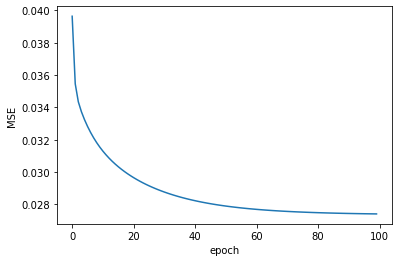

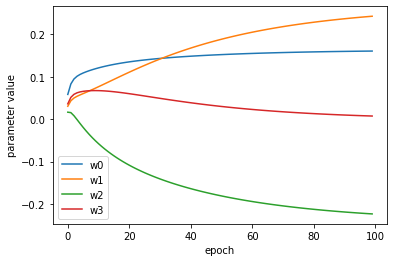

In [27]:
Reg=Regression(learning_rate=0.0010, regularization=0, n_epoch=100)
Reg.fit(X, y, plot=True)

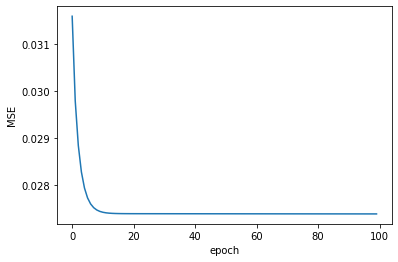

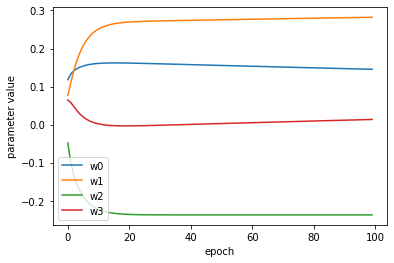

In [26]:
Reg=Regression(learning_rate=0.01, regularization=0, n_epoch=100)
Reg.fit(X, y, plot=True)

## Answer: